# QuTip Practice Codes

In [1]:
import numpy as np
from numpy import linalg
from scipy import linalg as splinalg
import matplotlib.pyplot as plt
from scipy import sparse as sp
import scipy.sparse.linalg
from functools import reduce
import itertools
from scipy import linalg
from scipy.linalg import expm, sinm, cosm

In [3]:
# We make use of Quantum Object Class using matrix representation
# since we need a data structure to store the properties of a 
# quantum operator and its eigenstates and values.
# The output corresponds to a 1X1 matrix with one zero entry.
# Names of classes are capitalized unlike the functions in Python
print(Qobj(), '\n \n********************** \n')

# Creating a user-defined data set by passing them in the form of
# arrays into the Q. Object class
print(Qobj([[1], [2], [3], [4], [5]]), '\n \n********************** \n') # 5X1 matrix - column vector

x = np.array([[1, 2, 3, 4, 5]])
print(Qobj(x), '\n \n********************** \n')

r = np.random.rand(4, 4)
print(Qobj(r), '\n \n********************** \n')

# Although dims and shape appear to be the same,
# dims keep track of the shapes of the individual 
# components of a multipartite system - check tensor section

# QuTip has built-in functions of commonly used state vectors
# Fock state ket vector: N = no. of levels in Hilbert space, #m = level containing excitation
N = 4
m = 0
alpha = 4+1j
f = fock(4, 3)
print(f, '\n \n********************** \n')

#Empty ket vector
zero_ket(N)

#Fock density matrix (outer product of basis) - hermitian by default
# Arguments same as fock(N,m)
fock_dm(N,3)

#Coherent state, alpha = complex no. (eigenvalue)
coherent(N,alpha)

#Coherent density matrix (outer product)
coherent_dm(N,alpha)

#Thermal density matrix (for n particles), n = particle number expectation value 
print(thermal_dm(N,1010)) # What does this mean by particle number expectation value?

print(coherent_dm(N,alpha).dims) 

NameError: name 'Qobj' is not defined

In [ ]:
q = destroy(4)
print(q)

In [ ]:
x = sigmax()

In [ ]:
q + 5

In [ ]:
x * x

In [ ]:
q ** 3

In [ ]:
x / np.sqrt(2)

In [ ]:
vac = basis(5, 0)
print(vac)
a = destroy(5)
print(a)

In [ ]:
print(a.dag())
print(a.dag() * vac)

In [ ]:
c = create(5)
print(c)

In [ ]:
print(c * vac)

In [ ]:
print(c * c * vac)
print(c ** 2 * vac)

In [ ]:
print(c * a * vac) # Applying number operator on |0>
print(c*a)

In [ ]:
print(c * a * (c * vac)) # Applying number operator on |1>

In [ ]:
print(c * a * (c**2 * vac).unit()) # Applying number operator on |2>

In [ ]:
ket = basis(5, 2)
print(ket)
n = num(5)
print(n)
print(n * ket)
ket = (basis(5, 0) + basis(5, 1)).unit()
print(ket)
print(n * ket)

In [ ]:
ket = basis(5, 2)
print(ket * ket.dag())

In [ ]:
print(fock_dm(5, 2))

In [ ]:
print(ket2dm(ket))

In [ ]:
# x = coherent_dm(5, 1.25)

# y = coherent_dm(5, np.complex(0, 1.25))  # <-- note the 'j'

# z = thermal_dm(5, 0.125)

# print(np.testing.assert_almost_equal(fidelity(x, x), 1))

# np.testing.assert_almost_equal(hellinger_dist(x, y), 1.3819080728932833)


In [ ]:
vac = basis(5, 0)
print(vac)

one = basis(5, 1)
print(one)

c = create(5)
print(c)

N = num(5)
print(N)

np.testing.assert_almost_equal(expect(N, vac), 0)

np.testing.assert_almost_equal(expect(N, one), 1)

coh = coherent_dm(5, 1.0j)

np.testing.assert_almost_equal(expect(N, coh), 0.9970555745806597)

cat = (basis(5, 4) + 1.0j * basis(5, 3)).unit()

np.testing.assert_almost_equal(expect(c, cat), 0.9999999999999998j)
print(expect(N, (c**2 * vac).unit()))

In [ ]:
Sxi = sigmax()
Sxi1 = sigmax()

# Using Numpy and Scipy

In [33]:
## Defining XY Hamiltonian 1D - nearest neighbor interactions only
sx = np.array([[0,1], [1, 0]])
sy = np.array([[0, -1j], [1j, 0]])
iden = np.eye(2)
sx1sx2 = np.matmul(np.kron(sx, iden),np.kron(iden, sx))
sy1sy2 = np.matmul(np.kron(sy, iden),np.kron(iden, sy))
H = sx1sx2 + sy1sy2
# print(H)
N = 2
Hm = np.zeros((2**N, 2**N), dtype = np.complex_)
Sxisxi1 = np.zeros((2**N, 2**N), dtype = np.complex_)
Syisyi1 = np.zeros((2**N, 2**N), dtype = np.complex_)
for i in range(N):
    Sxisxi1 = np.matmul(np.kron(sx, np.eye(2**(N-1))), np.kron(np.eye(2**(N-1)), sx))
    Syisyi1 = np.matmul(np.kron(sy, np.eye(2**(N-1))), np.kron(np.eye(2**(N-1)), sy))
    Hm += Sxisxi1 + Syisyi1  

# normed_matrix = normalize(Hm, axis=1, norm='l1') - applicable only for real entry matrices
print(Hm)

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 4.+0.j 0.+0.j]
 [0.+0.j 4.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [34]:
# Pauli Matrices
sigmaZ = sp.csc_matrix([[1, 0], [0, -1]])
sigmaX = sp.csc_matrix([[0, 1], [1, 0]])
sigmaY = sp.csc_matrix([[0, -1j], [1j, 0]])
sigmaI = sp.csc_matrix([[1, 0], [0, 1]])
sigmaH = sp.csc_matrix([[1, 1], [1, -1]])

Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
I = np.array([[1, 0], [0, 1]])

H = np.array([[1, 1], [1, -1]])

params = {
'N' : 1,
'tau_list':[0.05, 0.1, 0.5, 1],
'tau': 0.1,
'n': 2,
'alpha': 1,
'T': 10,
    'R': [],
    'r': [],
    'alpha': 1,
'opH': [X, Y], # Need to change this specific to Model
'pulses': [I, Z] # Need to change this specific to Model
}

In [35]:
def normalizeWF(psi,**kwargs):
    shape, dtype = psi.shape, psi.dtype
    NWF = psi
    if np.array_equal(psi, np.zeros(shape, dtype = dtype)) == True:
        NWF = psi
    elif np.vdot(psi, psi) == 0:
        NWF = psi
    else:
        NWF = psi/(np.sqrt(np.vdot(psi, psi)))
    return NWF

def sparseMatrices(a, **kwargs):
    return sp.csc_matrix(a)
      
def tensorOperators(matrix2D, **kwargs):
    return reduce(sp.kron, (sp.eye(2**kwargs['a']), matrix2D , sp.eye(2**kwargs['b'])))

def initialVals(params, **kwargs):
    n = params['n']
    N = params['N']
    alpha = params['alpha']
    op = params['opH']
    pulses = params['pulses']
    r = list(np.random.randint(low = 1,high=30,size=N))
    R = [np.power(1/x, alpha) for x in r]
    # r = np.random.random_sample(size = 2**N)
    psi0 = np.random.randn(2**N)
    psi_nm = normalizeWF(psi0)
    return n, N, r, op, pulses, psi_nm, R, alpha
n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)

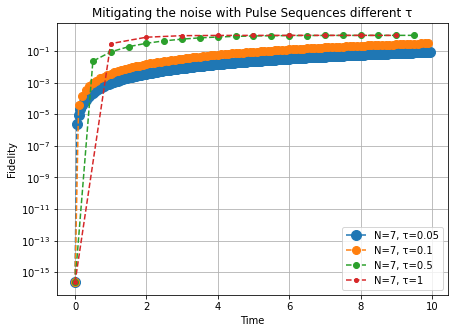

In [36]:
def TogglingFrameH(params, **kwargs):
    N, TFH = params['N'], []
    Hk, matrx = np.zeros((2**N,2**N)), np.zeros((2, 2))
    pulses, opH = params['pulses'], params['opH']
    for p in pulses:
        for op in opH:
            for i in range(N):
                matrx = sparseMatrices(p@op@(np.linalg.inv(p)))
                Hk += tensorOperators(matrx, a = i, b = N-1-i)
        TFH.append(Hk)
        Hk, matrx = np.zeros((2**N,2**N)), np.zeros((2, 2))
    return TFH

# TFH = TogglingFrameH(params)

def TimeEvolOpForTFH(params, **kwargs):
    TFH, unitary_timeOp, expTFH, tau, n = kwargs['TFH'], [], np.eye(2**params['N']), params['tau'], params['n']
    for i, hk in enumerate(TFH):
        expTFH = expm(-1j*tau*hk/n) @ expTFH
    t_list = np.arange(0, params['T'], tau)
    unitary_timeOp = [np.linalg.matrix_power(expTFH, i) for i, t in enumerate(t_list)]
    return unitary_timeOp, t_list
unitary_timeOp, t_list = TimeEvolOpForTFH(params, TFH = TogglingFrameH(params))

params['N'] = 7
params['pulses'] = [I, Z, X, Y]
params['n'] = len(params['pulses'])
params['opH'] = [X, Y, Z]
params['alpha'] = 2
n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
mss=10

plt.figure(figsize=[7,5])
for tau in params['tau_list']:
    params['tau'] = tau
    F = []
    uOp, t = TimeEvolOpForTFH(params, TFH = TogglingFrameH(params))
    psi_t = [u@psi_nm for i,u in enumerate(uOp)]
    F = [1-np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
#     print(F)
    plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}", ms=mss)
    mss -=2
    plt.yscale("log")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Fidelity")
    plt.title("Mitigating the noise with Pulse Sequences different τ")
    plt.grid('on')
plt.show()

In [37]:
def H_noise(params, **kwargs):
    N = params['N']
    op = params['opH']
    Hnoise = np.zeros((2**N, 2**N))
    for i in range(N):
        Hnoise += tensorOperators(sparseMatrices(op[0]), a = i, b = N-1-i)
    return Hnoise
# print(H_noise(params))    

def TimeOpAvgH(params, **kwargs):
    H = kwargs['H']
    t_list = np.arange(0,1, params['tau'])
    unitary_timeOp = [expm(-1j*t*H) for t in t_list]
    return unitary_timeOp, t_list

def TogglingFrameH(params, **kwargs):
    N, TFH = params['N'], []
    Hk, matrx = np.zeros((2**N,2**N)), np.zeros((2, 2))
    pulses, opH = params['pulses'], params['opH']
    for p in pulses:
        for op in opH:
            for i in range(N):
                matrx = sparseMatrices(p@op@(np.linalg.inv(p)))
                Hk += R[i]*tensorOperators(matrx, a = i, b = N-1-i)
        TFH.append(Hk)
        Hk, matrx = np.zeros((2**N,2**N)), np.zeros((2, 2))
    return TFH
# TFH = TogglingFrameH(params)
# print(TFH)

def avgHFromTogglingFrameH(params, **kwargs):
    n = params['n']
    N = params['N']
    avgH = np.zeros((2**N, 2**N))
    TFH  = kwargs['TFH']
    avgH = sum(TFH)/len(TFH)
    return avgH
# print(avgHFromTogglingFrameH(params))

def TimeEvolOpForTFH(params, **kwargs):
    TFH, unitary_timeOp, expTFH, tau, n, T = kwargs['TFH'], [], np.eye(2**params['N']), params['tau'], params['n'], params['T']
    for i, hk in enumerate(TFH):
        expTFH = expm(-1j*tau*hk/n) @ expTFH
    t_list = np.arange(0, 10, tau)
    unitary_timeOp = [np.linalg.matrix_power(expTFH, i) for i, t in enumerate(t_list)]
    return unitary_timeOp, t_list
# unitary_timeOp, t_list = TimeEvolOpForTFH(params, TFH = TogglingFrameH(params))
    
def F_tvals(params, **kwargs):
    H, Utop_present = kwargs['H'], kwargs['Utop_present']
    H_present = kwargs['H_present']
    F_t, Ft2, T_list, UToP = [], [], [], []
    for i in params['tau_list']:
        params['tau'] = i
        if H_present == 'True':
            unitary_timeOp, t_list = utimeOpH(params, H = H)
        elif Utop_present == 'True':
            unitary_timeOp, t_list = TimeEvolOpForTFH(params, TFH = H)
        UToP.append(unitary_timeOp)
        T_list.append(t_list)
        psi_t = [normalizeWF(np.matmul(unitary_timeOp[i],psi_nm)) for i in range(len(unitary_timeOp))]
        F_t.append([1-np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t])
#         Ft2 = [1-f for i in range(len(F_t)) for f in F_t[i]]
#         t_list = [(i**2)*j**2 for j in t_list]
#         plt.figure(figsize=[7,5])
#         plt.plot( t_list, Ft2, label = f"N={params['N']}, τ={params['tau']}")
#         plt.xlabel("$\mathregular{(τT)^2}$")
#         plt.ylabel("$\mathregular{(1 - F)}$")
#         plt.grid('on')
#         plt.legend()
        Ft2 = []
    plt.show()
    return unitary_timeOp, psi_t, F_t, Ft2, T_list, UToP

def plottingFidelityVsTaus(params, **kwargs):
    Utop_present = kwargs['Utop_present']
    H_present = kwargs['H_present']
    unitary_timeOp, psi_t, F_t, Ft2, T_list, UToP = F_tvals(params, H = H, H_present = H_present, Utop_present = Utop_present)
    plt.figure(figsize=[7,5])
    plt.xlabel("Time")
    plt.ylabel("Fidelity")
    plt.title("Mitigating the noise with Pulse Sequences different τ")
    plt.grid('on')
    for i in range(len(F_t)):
        plt.plot( T_list[i], F_t[i], label = f"N={params['N']}, τ={params['tau_list'][i]}")
        plt.yscale('log')
        plt.legend()
    plt.show()
    pass

params['opH'] = [X, Y]
params['pulses'] = [I, Z]
params['n'] = 2
# H = avgHFromTogglingFrameH(params, TFH = TogglingFrameH(params))
# plottingFidelityVsTaus(params, H = H, H_present = 'True', Utop_present = 'False')
# print(utimeOp(params, H = H, H_present = 'True', Utop_present = 'False'))
# print(H)

# H = TogglingFrameH(params)
# plottingFidelityVsTaus(params, H = H, H_present = 'False', Utop_present = 'True')
# print(TFHutimeOp(params, H = H, H_present = 'True', Utop_present = 'False'))
# print(H)

In [38]:
params['N'] = 5
params['opH'] = [X]
params['pulses'] = [I, Z]
params['n'] = 2
n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
def TogglingFrame_Ising(params, **kwargs):
    N = params['N']
    TFH = []
    pulses = params['pulses']
    for p in pulses:
        Hk, matrx1, matrx2 = np.zeros((2**N, 2**N), dtype=complex), np.zeros((2, 2)), np.zeros((2, 2)) 
        for op in params['opH']:
            for i in range(N-1):
                matrx1 = sparseMatrices(op)
                matrx2 = sparseMatrices(op)
                if N%2 == 0:
                    if i%2 == 0 and (i+1)%2 != 0:
                        matrx1 = sparseMatrices(p@op@(np.linalg.inv(p)))
                    elif (i+1)%2 == 0 and (i%2!=0):
                        matrx2 = sparseMatrices(p@op@(np.linalg.inv(p)))
                elif N%2!=0:
                    if i%2 == 0 and (i+1)%2 != 0:
                        matrx2 = sparseMatrices(p@op@(np.linalg.inv(p)))
                    elif (i+1)%2 == 0 and (i%2!=0):
                        matrx1 = sparseMatrices(p@op@(np.linalg.inv(p)))
                Hk += reduce(sp.kron, (sp.eye(2**i), matrx1, matrx2, sp.eye(2**(N-2-i))))
        TFH.append(Hk)
    return TFH
# print(TogglingFrame_Ising(params))

# H = avgHFromTogglingFrameH(params, TFH = TogglingFrame_Ising(params))
# plottingFidelityVsTaus(params, H = H, H_present = 'True', Utop_present = 'False')

# H = utopFromTFH(params, TFH = TogglingFrame_Ising(params))
# plottingFidelityVsTaus(params, H = H, H_present = 'False', Utop_present = 'True')

# Cutoff Distance Code

In [19]:
lst = [np.eye(1), X, X, np.eye(1)]
XX = reduce(np.kron, lst)
print(XX)

lst = [np.eye(1), Y, Y, np.eye(1)]
YY = reduce(np.kron, lst)
print(YY)

print(XX+YY)

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[[ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 2.+0.j 0.+0.j]
 [0.+0.j 2.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [8]:
# Using Walsh Indices

# Generates WI and stores as a col vector in dictionary corresponding to the site [key]
def WalshIndicesGenerate(params, **kwargs):
    N = params['N']
    n = params['n']
    qbit_wi = {}
    for i in range(N):
        qbit_wi[i] = np.full(n, i)
    return qbit_wi
# print(WalshIndicesGenerate(params))
# qbit_wi = WalshIndicesGenerate(params)

### Functions below are useful to construct the avg. H from WI

# Generates WI to decouple within a given cutoff
def WI_Decouple_cutoff(params, **kwargs):
    N, n, cutoff_dist = params['N'], params['n'], kwargs['cutoff_dist']
    WIR_x, WIR_y, wirx, wiry = [], [], [], []
    for i in range(0, N, 1):
        if i%cutoff_dist <= cutoff_dist-1: 
            wirx.append(i%(cutoff_dist))
            wiry.append(i%(cutoff_dist))
            if i%(cutoff_dist)+1 == cutoff_dist:
                WIR_x.append(wirx)
                WIR_y.append(wiry)
                wirx, wiry = [], []
    return (WIR_x, WIR_y)

# print(WI_Decouple_cutoff(params, cutoff_dist = 3))
# WIR = WI_Decouple_cutoff(params, cutoff_dist = 3)

# Generates the terms in H for WI with cutoff
def HamiltonianTermFromWI_cutoff(params, **kwargs):
    N, matrx, WIR = params['N'], kwargs['matrx'], kwargs['WIR']
    lst, Lfinal = [I]*N, []
    for wir in WIR:
        for j in range(len(wir)):
            for k in range(j+1, len(wir), 1):
                if wir[k]==wir[j] and k!=j:
                    lst[k] = matrx
                    lst[j] = matrx
                    Lfinal.append(lst)
                    lst = [I]*N                   
    return Lfinal
# print(HamiltonianTermFromWI_cutoff(params, cutoff_dist = 4, matrx = X, WIR = [[0, 0, 2, 0], [0, 1, 0]]))

# This function gives the final H given a walsh_seq with a cutoff dist. 
def WI_HamiltonianFinal(params, **kwargs):
    N = params['N']
    H, cutoff_dist, matrxs, lst = np.zeros((2**N, 2**N)), kwargs['cutoff_dist'], kwargs['matrxs'], []
    WIR = WI_Decouple_cutoff(params, cutoff_dist = cutoff_dist)
    for matrx in matrxs:
        for w in WIR:
            lst = HamiltonianTermFromWI_cutoff(params, cutoff_dist = cutoff_dist, matrx = matrx, WIR = w)
            for l in lst:
                H += reduce(sp.kron, l)      
    return H
# print(WI_HamiltonianFinal(params, cutoff_dist = 3, matrxs = [X, Y]))

# WI_Sequence(params, WIR = WI_Decouple_cutoff(params, cutoff_dist = 3))
# WI_seq, c = {}, 0
# for i in WIR_x:
#     WI_seq[c] = qbit_wi[i]
#     c+=1
# print(WI_seq)

# Walsh Pulse Sequence

In [125]:
print(max(max([1, 2], [1, 3])))

3


In [39]:
H = np.array([[1, 1], [1, -1]])

def WF_Conditions(tupleprdt, **kwargs): 
    """
    *args: tupleprdt is a list of tuple of 
    signs of wxi and wyi. 
    Returns: tupleprdt - a list of Pauli Ops
    depending on eq 8 from the paper
    """
    for i, tprdt in enumerate(tupleprdt):
        if tprdt[0] == tprdt[1] == 1:
            tupleprdt[i] = I
        elif tprdt[0] == -tprdt[1] == 1:
            tupleprdt[i] = X
        elif -tprdt[0] == tprdt[1] == 1:
            tupleprdt[i] = Y
        elif tprdt[0] == tprdt[1] == -1:
            tupleprdt[i] = Z
#     print(tupleprdt)
    return tupleprdt   
# print(WF_Conditions(tupleprdt = [(1,1), (1,-1), (-1, -1)]))

def WF_Generate(params, **kwargs):
    """
    **kwargs: 
    'Wx', 'Wy' [Required] - list of one element 
    consisting the index of x, y part of one
    qubit. 
    'q'[Optional] - gives the number of times H has
    to tensor product with itself. Useful to form WF based
    on the highest index of decoupling lists of Wx, Wy.
    'We' [Optional] - used for generating only the WF 
    for a list of Walsh Indices without their corresp.
    Pauli Ops.
    Returns: lstPaulOp
    With Required Parameters - a list of Pauli Ops
    based on the W.I associated with that qubit.
    With 'We' [Optional] parameter - a list of only WF
    for a list of Walsh Indices without their corresp.
    Pauli Ops.
    """
    lst, q, signTuple, lstPaulOp = [], 0, [], []
    H0, H1 = np.eye(1), H
    if 'q' in kwargs:
        q = kwargs['q']
    elif 'We' in kwargs:
        q = int(np.ceil(np.log2(np.max(kwargs['We'])+1)))
    elif 'wx' and 'wy' in kwargs:
        q = int(np.ceil(np.log2(max(kwargs['wx'], kwargs['wy'])+1)))
    if q == 0:
        lst = [H0]
    else:
        lst = [H1]
        for i in range(q-1):
            lst += [H1]
    Hf = reduce(np.kron, lst)
    if 'We' in kwargs:
        lstPaulOp = [Hf[we] for we in kwargs['We']]
    else:
        wx, wy = kwargs['wx'], kwargs['wy']
        wfx, wfy = Hf[wx], Hf[wy]
        for i, wfx_k in enumerate(wfx):
            signTuple += [(wfx_k, wfy[i])]
    #     print(signTuple)
        lstPaulOp = WF_Conditions(signTuple)
    return lstPaulOp
# print(WF_Generate(params, We = [0, 1]))
# print(WF_Generate(params, wx = 1, wy = 1))

lst = [[expm(-1j*I*(+1)*(np.pi + 0.001)/2), expm(-1j*I*(+1)*(np.pi + 0.002)/2)],
[expm(-1j*I*(+1)*(np.pi + 0.001)/2), expm(-1j*Z*(-1)*(np.pi + 0.002)/2)]]
def WF_WIList(params, **kwargs):
    """
    **kwargs: 'Wx', 'Wy' [Required] - list consisting the 
    index of x, y part of each qubit.
    'WF_We' [Optional] - used for generating pulses 
    with rotational errors.
    Returns: Pseq - Pulse sequence.
    """
    Wx, Wy, lstPaulOp, Pseq = kwargs['Wx'], kwargs['Wy'], [], []
    q = int(np.ceil(np.log2(max(max(Wx, Wy))+1)))
#     print(q)
    for i, wx in enumerate(Wx):
#         print(f'Tuple at i={i}')
        lstPaulOp += [WF_Generate(params, wx = wx, wy = Wy[i], q = q)]
#     padded_lstPaulOp = list(zip(*itertools.zip_longest(*lstPaulOp, fillvalue=I)))
#     print(f'padded_lstPaulOp = {padded_lstPaulOp}')
    pseq_k = [[] for _ in range(len(lstPaulOp[0]))]
    for i, ps_k in enumerate(pseq_k):
        for j, paulop in enumerate(lstPaulOp):
                if 'WF_We' in kwargs:
#                     delt = params['deltaErr_list']
#                     WFwe = kwargs['WF_We']
#                     print(f'params[deltaErr_list][qbit={j}]={delt[j]}')
#                     print(f'kwargs[WF_We][k={i}][qbit={j}]={WFwe[i][j]}')
                    pseq_k[i] += [expm(-1j*paulop[i]*(np.pi + params['deltaErr_list'][j])*kwargs['WF_We'][j]/2)]
                else:
                    pseq_k[i] += [paulop[i]]
#                 print(f'At k={i}, qbit={j}, pseq_k ={pseq_k[i][j]}')
#                 print(f'lst[k={i}][qbit={j}]={lst[i][j]}')
#     print('--------------------------------------------------------------------------')
    for i, ps_k in enumerate(pseq_k):
        Pseq += [reduce(np.kron, ps_k)]
#         print(f'Pseq_{i} = {Pseq[i]}')
#         print(f'pulse_list_{i} = {reduce(np.kron, lst[i])}')
#         print('*********************')
    return Pseq
params['deltaErr_list'] = [0.001, 0.002]
max_index = 2
params['N'] = max_index
# params['WF_We'] = WF_PulseRotErr(params, We = list(range(0, max_index, 1)))
We = list(range(1, max_index+2, 1))
params['WF_We'] = WF_Generate(params, We = We)
# print(params['WF_We'])
P = []
for i in params['WF_We']:
    P += [WF_WIList(params, Wx = [0, 1], Wy = [0, 1], WF_We = i)]
#     print(f'l={i}:\n P_{i}={P}')
# print(P)
# print(P[0])
# print(reduce(np.kron, lst[0]))
# print(reduce(np.kron, [I, I]))
# print('**************')
# print(P[1])
# print(reduce(np.kron, lst[1]))
# print(reduce(np.kron, [I, Z]))
# print('**************')
# print(P[2])
# print(reduce(np.kron, [I, I, Z]))
# print('**************')
# print(P[3])
# print(reduce(np.kron, [I, Z, Z]))
# print('**************')
    
def WPSresource_Hamiltonian_TimeEvolOp_IsingType(params, **kwargs):
    """
    Returns: Resource Hamiltonian (Hr) for Ising Type XX+YY and 
    its time evolution for τ time.
    """
    N, opH, unitary_timeOp = params['N'], params['opH'], 0
    H_r, R, r, alpha = np.zeros((2**N, 2**N), dtype = complex), params['R'], params['r'], params['alpha']
    lst = [I for _ in range(N)]
    for op in opH:
        for i in range(N):
            for j in range(i+1, N, 1):
                lst[i] = op
                lst[j] = op
                H_r += (np.abs(R[i]-R[j]))*reduce(np.kron, lst)/(np.power(np.abs(i-j), alpha))
#                 H_r += reduce(np.kron, lst)
#                 H_r += reduce(np.kron, lst)/(np.power(np.abs(i-j), alpha))
                lst = [I for _ in range(N)]
    tau = params['tau']
#     print(f'Hr-tau={tau}')
    unitary_timeOp = expm(-1j*tau*H_r/(params['n']))
    return H_r, unitary_timeOp


def WPSeq_TimeEvolOp(params, **kwargs):
    """
    To input any Hamiltonian other than XY, use 'Hr' in kwargs.
    **kwargs: Hr Optional
    Returns: Unitary time evolution operator as per eq1
    and time interval based on τ step.
    """
    Pseq, unitary_timeOp, timeOpPHrP = params['pulses'], [], np.eye(2**(params['N']))
#     print(params['tau'])
    if 'Hr' in kwargs:
        Hr = kwargs['Hr']
        expHr = expm(-1j*params['tau']*Hr/(params['n']))
    else:
        Hr, expHr = WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)
    for i, p in enumerate(Pseq):
        timeOpPHrP = np.linalg.inv(p) @ expHr @ p @ timeOpPHrP
#     print(timeOpPHrP)
    t_list = np.arange(0, params['T'], params['tau'])
    unitary_timeOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, t in enumerate(t_list)]
    return unitary_timeOp, t_list
# print(WPSeq_TimeEvolOp(params)[0][1])
# params['tau'] = 0.5
# WPSeq_TimeEvolOp(params)

# max_index = 8
# W_x, W_y = list(range(0, max_index, 1)), list(range(0, max_index, 1))
# params['N'] = len(W_x)
# params['pulses'] = WF_WIList(params, W_x = W_x, W_y = W_y)
# params['n'] = len(params['pulses'])
# # print(params['n'])
# params['opH'] = [X, Y]
# n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
# params['R'], params['r'], params['alpha'] = R, r, 1
# params['alpha_list'] = [0.5, 1, 1.2, 2, 3, 6, 12]
# # params['tau'] = params['tau_list'][0]
# params['T'] = 10
# # print(WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)[0].shape)
# # print(params['pulses'])


# for alpha in params['alpha_list']:
#     params['alpha'] = alpha
#     mss = 10
#     for tau in params['tau_list']:
#         psi_t, F, uOp, t = [], [], [], []
#         params['tau'] = tau
#         print(params['tau'])
#         uOp, t = WPSeq_TimeEvolOp(params)
#         psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(uOp)]
#         F = [1-np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
#         plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}, α={params['alpha']}", ms=mss)
#         mss -=1
#         plt.yscale("log")
#         plt.legend()
#         plt.xlabel("Time")
#         plt.ylabel("Fidelity")
#         plt.title("Mitigating the noise with Pulse Sequences different τ")
#         plt.grid('on')
#     plt.show()
        

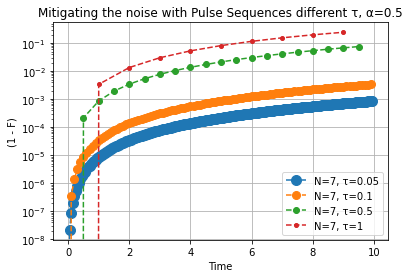

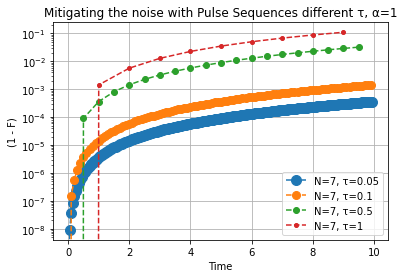

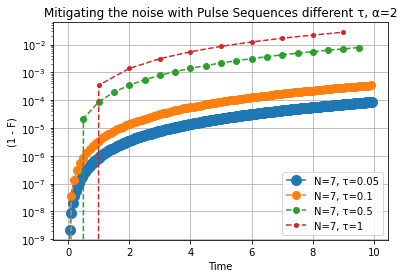

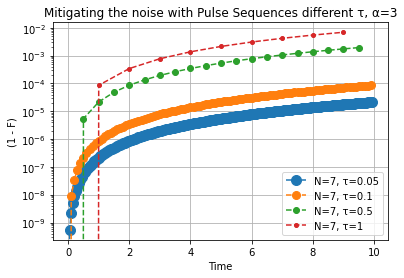

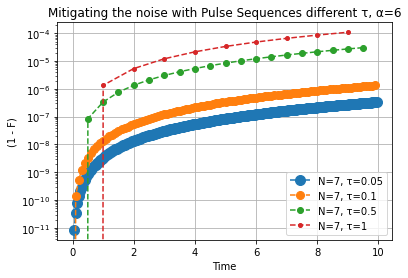

In [40]:
params['alpha_list'] = [0.5, 1, 2, 3, 6]
params['tau_list'] = [0.05, 0.1, 0.5, 1]
params['alpha'] = params['alpha_list'][0]
max_index = 8
Wx, Wy = list(range(1, max_index, 1)), list(range(1, max_index, 1))
# Wx, Wy = [3, 4], [3, 4]
params['N'] = len(Wx)
params['pulses'] = WF_WIList(params, Wx = Wx, Wy = Wy)
Pseq = params['pulses']
params['n'] = len(params['pulses'])
params['opH'] = [X, Y] 
n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
params['R'], params['r'] = R, r

# Hr = np.array([[0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
#         0.  +0.j, 0.  +0.j],
#        [0.  +0.j, 0.  +0.j, 2.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j,
#         0.  +0.j, 0.  +0.j],
#        [0.  +0.j, 2.  +0.j, 0.  +0.j, 0.  +0.j, 2.  +0.j, 0.  +0.j,
#         0.  +0.j, 0.  +0.j],
#        [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 2.  +0.j,
#         0.25+0.j, 0.  +0.j],
#        [0.  +0.j, 0.25+0.j, 2.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
#         0.  +0.j, 0.  +0.j],
#        [0.  +0.j, 0.  +0.j, 0.  +0.j, 2.  +0.j, 0.  +0.j, 0.  +0.j,
#         2.  +0.j, 0.  +0.j],
#        [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j, 2.  +0.j,
#         0.  +0.j, 0.  +0.j],
#        [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
#         0.  +0.j, 0.  +0.j]])

for alpha in params['alpha_list']:
    params['alpha'] = alpha

    cls = 10
    for tau in params['tau_list']:
        psi_t, F, uOp, t = [], [], [], []
        params['tau'] = tau
    #     exphr = (-1j*tau*Hr/(params['n']))
    #     timeOpPHrP = np.linalg.inv(Pseq[3])@exphr@Pseq[3]@np.linalg.inv(Pseq[2])@exphr@Pseq[2]@np.linalg.inv(Pseq[1])@exphr@Pseq[1]@np.linalg.inv(Pseq[0])@exphr@Pseq[0]
    #     timeOpPHrP = np.eye(2**(params['N']))
    #     for i, p in enumerate(params['pulses']):
    #         timeOpPHrP = np.linalg.inv(p) @ exphr @ p @ timeOpPHrP
    #     t_list = np.arange(0, params['T'], tau)
    #     uOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, t in enumerate(t_list)]
        uOp, t = WPSeq_TimeEvolOp(params)
        psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(uOp)]
        F = [1-np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
        plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}", ms=cls)
        cls -=2
        plt.yscale("log")
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("(1 - F)")
        plt.title(f"Mitigating the noise with Pulse Sequences different τ, α={params['alpha']}")
        plt.grid('on')
    plt.show()
    
# print(Pseq[0])
# print(reduce(np.kron, [I, I, I]))
# print('**************')
# print(Pseq[1])
# print(reduce(np.kron, [I, Z, I]))
# print('**************')
# print(Pseq[2])
# print(reduce(np.kron, [I, I, Z]))
# print('**************')
# print(Pseq[3])
# print(reduce(np.kron, [I, Z, Z]))
# print('**************')

In [24]:
help(WPSeq_TimeEvolOp) # Testing

Help on function WPSeq_TimeEvolOp in module __main__:

WPSeq_TimeEvolOp(params, **kwargs)
    To input any Hamiltonian other than XY, use 'Hr' in kwargs.
    **kwargs: Hr Optional
    Returns: Unitary time evolution operator as per eq1
    and time interval based on τ step.



In [28]:
# lst = [[X, X, I], [Y, Y, I], [X, I, X], [Y, I, Y], [I, X, X], [I, Y, Y]]
# lst = [[X, X, I], [Y, Y, I]]
# lst =  [[X, I, X], [Y, I, Y]]
lst = [[I, X, X], [I, Y, Y]]
# lst = [[X, X], [Y, Y]]
Hr = np.zeros((8, 8), dtype = complex)
# Hr = []
for l in lst:
    Hr += reduce(np.kron, l)/(np.power(np.abs(2-3), 3))
    #     Hr += [reduce(np.kron, l)]
print(repr(Hr))

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])


In [77]:
print(reduce(np.kron, [I, Z, Z]))
print('**************')
print(np.linalg.inv(reduce(np.kron, [X, I, X])))

[[ 1  0  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0 -1  0  0]
 [ 0  0  0  0  0  0 -1  0]
 [ 0  0  0  0  0  0  0  1]]
**************
[[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]


In [32]:
HHr = np.zeros((8, 8), dtype = complex)
HHr = np.array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]]) + np.array([[0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.25+0.j, 0.  +0.j],
       [0.  +0.j, 0.25+0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j]]) + np.array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

print(repr(HHr))

array([[0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 2.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 2.  +0.j, 0.  +0.j, 0.  +0.j, 2.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 2.  +0.j,
        0.25+0.j, 0.  +0.j],
       [0.  +0.j, 0.25+0.j, 2.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 2.  +0.j, 0.  +0.j, 0.  +0.j,
        2.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j, 2.  +0.j,
        0.  +0.j, 0.  +0.j],
       [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
        0.  +0.j, 0.  +0.j]])


In [30]:
H0 = np.array([[1]])
for i, k in enumerate(H0[0]):
    print(i)

0 1


In [16]:
# params['tau'] = 0.5
# WPSeq_TimeEvolOp(params)

In [17]:
# params['tau'] = 0.1
# WPSeq_TimeEvolOp(params)

In [12]:
Hr = np.zeros((2**2, 2**2), dtype = complex)
for lst in [[X, X], [Y, Y]]:
    Hr += reduce(np.kron, lst)
expHr = expm(-1j*Hr*1/2)
lst1, lst2 = [I, I], [I, Z]
timeOp = reduce(np.kron, lst2) @ expHr @ reduce(np.kron, lst2) @ reduce(np.kron, lst1) @ expHr @ reduce(np.kron, lst1)
print(timeOp)

[[1.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  0.+0.00000000e+00j]
 [0.+0.00000000e+00j 1.+0.00000000e+00j 0.-1.11022302e-16j
  0.+0.00000000e+00j]
 [0.+0.00000000e+00j 0.+1.11022302e-16j 1.+0.00000000e+00j
  0.+0.00000000e+00j]
 [0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  1.+0.00000000e+00j]]


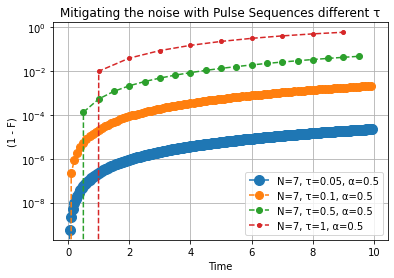

In [9]:
# max_index = 8
# Wx, Wy = list(range(1, max_index, 1)), list(range(1, max_index, 1))
# params['N'] = len(Wx)
# params['pulses'] = WF_WIList(params, Wx = Wx, Wy = Wy)
# params['n'] = len(params['pulses'])
# params['opH'] = [X, Y] 
# n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
# params['R'], params['r'], params['alpha'] = R, r, 2
params['alpha_list'] = [0.5, 1, 1.2, 2, 3, 6]
params['tau_list'] = [0.05, 0.1, 0.5, 1]
params['alpha'] = params['alpha_list'][0]

# for alpha in params['alpha_list']:
#     params['alpha'] = alpha
cls = 10
for tau in params['tau_list']:
    psi_t, F, uOp, t = [], [], [], []
    params['tau'] = tau
    max_index = 8
    Wx, Wy = list(range(1, max_index, 1)), list(range(1, max_index, 1))
    params['N'] = len(Wx)
    params['pulses'] = WF_WIList(params, Wx = Wx, Wy = Wy)
    params['n'] = len(params['pulses'])
    params['opH'] = [X, Y] 
    n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
    params['R'], params['r'] = R, r

    uOp, t = WPSeq_TimeEvolOp(params)
    psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(uOp)]
    F = [1-np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
    plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}, α={params['alpha']}", ms=cls)
    cls -=2
    plt.yscale("log")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("(1 - F)")
    plt.title("Mitigating the noise with Pulse Sequences different τ")
    plt.grid('on')
plt.show()


In [14]:
print(R)

[4.306293476164868e-18, 3.186308177103569e-13, 2.4414062500000014e-16, 1.7163780166626958e-15, 3.5407061614721473e-12, 4.306293476164868e-18, 1.0000000000000006e-12]


C:\Users\barbi\AppData\Local\Temp\ipykernel_10704\3431932560.py:20: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")
C:\Users\barbi\AppData\Roaming\Python\Python39\site-packages\matplotlib_inline\backend_inline.py:234: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


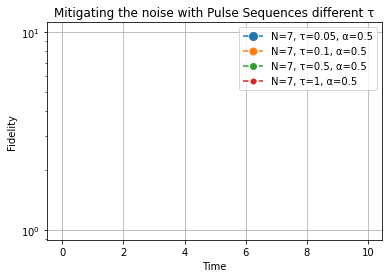

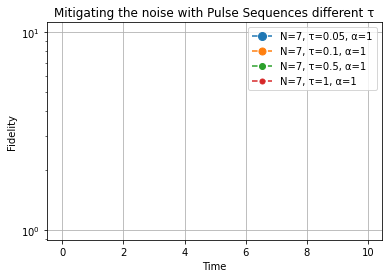

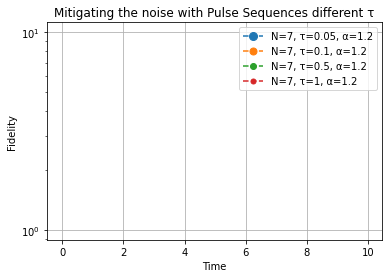

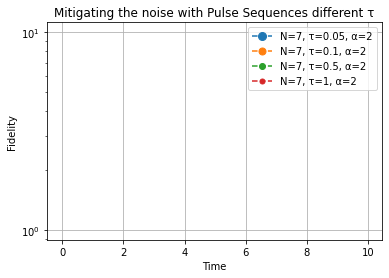

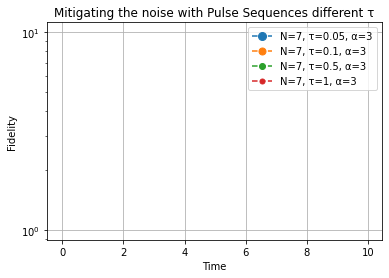

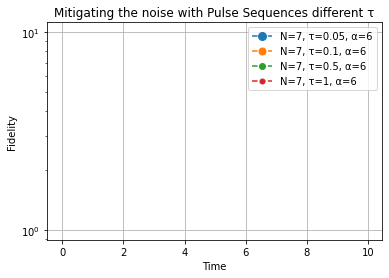

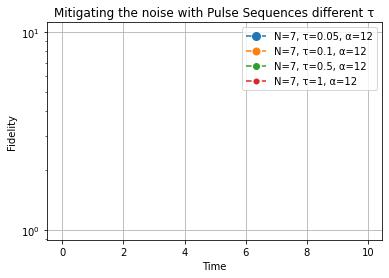

In [15]:
for alpha in params['alpha_list']:
    Pseq, unitary_timeOp, timeOpPHrP = params['pulses'], [], np.eye(2**(params['N']))
    params['n'] = len(Pseq)
    mss = 8
    params['alpha'] = alpha
    for tau in params['tau_list']:
        params['tau'] = tau
        uOp, t = WPSeq_TimeEvolOp(params)
#         Hr, expH_r = WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)
#         for k, p in enumerate(Pseq):
#             timeOpPHrP = np.linalg.inv(p) @ expH_r @ p @ timeOpPHrP
#         t = np.arange(0, params['T'], params['tau'])
#         uOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, t in enumerate(t)]
        psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(uOp)]
        F = [1-np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
#         print(F)
#         print('***********************')
        plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}, α={params['alpha']}", ms=mss)
        mss -=1
        plt.yscale("log")
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Fidelity")
        plt.title("Mitigating the noise with Pulse Sequences different τ")
        plt.grid('on')
    plt.show()

In [16]:
# lst = [I, I, I]
# lst = [Z, I, Z]
# lst = [I, Z, Z]
# lst = [X, X]
# print(reduce(np.kron, lst))
# lst = [Y, Y]
# print(reduce(np.kron, lst))

Hr = np.zeros((2**2, 2**2), dtype = complex)
for lst in [[X, X], [Y, Y]]:
    Hr += reduce(np.kron, lst)
expHr = expm(-1j*Hr*0.05/2)
print(expHr)

[[1.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.99875026+0.j         0.        -0.04997917j
  0.        +0.j        ]
 [0.        +0.j         0.        -0.04997917j 0.99875026+0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  1.        +0.j        ]]


In [17]:
# # def WF_Generate(params, **kwargs):
# #     N, lst, W_x, W_y, tupleprdt = params['N'], [H], kwargs['W_x'], kwargs['W_y'], []
# W_y = [0, 1, 2, 3, 4]
# tupleprdt, lst = [], []

# for i, w_x in enumerate([0, 1, 2, 3, 4]):
#     H0, H1 = np.array([1]), H 
#     w_y = W_y[i]
#     q = int(np.ceil(np.log2(max(w_x, w_y)+1)))
#     print('w_x', 'w_y')
#     print((w_x, w_y))
#     print('i', 'q')
#     print(i, q)
#     if q == 0:
#         lst = [H0]
#         tupleprdt.append((1, 1)) # Since if the max(wx, wy) is 0, then both are zero.
#     else:
#         lst = [H1]
#         for i in range(q-1):
#             lst.append(lst[i])
# #     print(lst)
# #     print('*******************************')
#     Hf = reduce(np.kron, lst)
#     wx, wy = Hf[w_x], Hf[w_y]
#     print('wfx', 'wfy')
#     print((wx, wy))
#     print('*******************************')
    
# def WF_Generate(params, **kwargs):
#     N, lst, W_x, W_y, tupleprdt, q, lst = params['N'], [H], kwargs['W_x'], kwargs['W_y'], [], 0, []
#     H0, H1 = np.array([1]), H 
#     q = int(np.ceil(np.log2(max(W_x, W_y)+1)))
#     if q == 0:
#         lst = [H0]
#         tupleprdt.append((1, 1)) # Since if the max(wx, wy) is 0, then both are zero.
#     else:
#         lst = [H1]
#         for i in range(q-1):
#             lst.append(lst[i])
#     Hf = reduce(np.kron, lst)
#     w_x, w_y = Hf[W_x-1], Hf[W_y-1]
#     Hf = reduce(np.kron, lst)
#     wfx, wfy = Hf[W_x], Hf[W_y]
# #     print((w_x, w_y))
#     for i, h in enumerate(wfx):
#         tupleprdt.append((h, wfy[i]))
#     tupleprdt = WF_Conditions(tupleprdt)
#     return tupleprdt
# print(WF_Generate(params, W_x = 3, W_y = 3))


# #         lst = lst*(q-1)
# #         Hf = reduce(np.kron, lst)
# #         w_x, w_y = Hf[W_x-1], Hf[W_y-1]
# #         for i, h in enumerate(w_x):
# #             tupleprdt.append((h, w_y[i]))
# #         tupleprdt = WF_Conditions(tupleprdt)
# #     return tupleprdt
# # print(WF_Generate(params, W_x = 0, W_y = 1, index = 1))
    
# # def WF_WIList(params, **kwargs):
# #     W_x, W_y, tupleprdt, ps, Pseq = kwargs['W_x'], kwargs['W_y'], [], [], []
# #     for i, w_x in enumerate(W_x):
# #         print(i)
# #         tupleprdt.append(WF_Generate(params, W_x = w_x, W_y = W_y[i]))
# #         print(tupleprdt)
# #     return tupleprdt
# # print(WF_WIList(params, W_x = [3], W_y = [3]))

In [18]:
for a in [0, 1, 2, 3, 4, 7]:
    q = int(np.ceil(np.log2(a+1)))
    print(q)

0
1
2
2
3
3


In [19]:
lst = [H, H, H]
print(reduce(np.kron, lst)[4])
print([I for _ in range(4)])

[ 1  1  1  1 -1 -1 -1 -1]
[array([[1, 0],
       [0, 1]]), array([[1, 0],
       [0, 1]]), array([[1, 0],
       [0, 1]]), array([[1, 0],
       [0, 1]])]


In [20]:
# W_x, W_y = [1, 2, 3], [1, 2, 3]
# params['pulses'] = WF_WIList(params, W_x = W_x, W_y = W_y)
# params['N'] = len(W_x)
# params['n'] = len(params['pulses'])
# params['opH'] = [X, Y] 
# n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
# params['R'], params['r'], params['alpha'] = R, r, 2
def WPSresource_Hamiltonian_TimeEvolOp_IsingType(params, **kwargs):
    N, H_r, unitary_timeOp, opH = params['N'], np.zeros((2**params['N'], 2**params['N']), dtype = complex), 0, params['opH']
    R, r, alpha, lst = params['R'], params['r'], params['alpha'], [I for _ in range(N)]
    for op in opH:
        for i in range(N):
            for j in range(i+1, N, 1):
                lst[i] = op
                lst[j] = op
                H_r += (R[i]-R[j])*reduce(np.kron, lst)/(np.power(np.abs(i-j), alpha))
                lst = [I for _ in range(N)]
    tau = params['tau']
    unitary_timeOp = expm(-1j*tau/(params['n'])*H_r)
    return H_r, unitary_timeOp
# params['N'] = 3
# params['opH'] = [X, Y]
# n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
# params['R'], params['r'], params['alpha'] = R, r, 1
# print(WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)[0].shape)
# print(WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)[1].shape)
    
# Need to make changes to this function 
# def WPSeq_TimeEvolOp(params, **kwargs):
#     Pseq, unitary_timeOp, PexpHr = params['pulses'], [], np.eye(2**params['N'])
#     params['n'], pexpHr_lst = len(Pseq), []
#     Hr, unitary_timeOpH_r = WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)
# #     print(unitary_timeOpH_r.shape)
#     for k, p in enumerate(Pseq):
# #         print(p[0].shape)
#         if k == 0:
#             PexpHr = unitary_timeOpH_r @ p @ PexpHr
#             pexpHr_lst += [PexpHr]
#         elif k == len(Pseq)-1:
#             PexpHr = np.linalg.inv(p) @ unitary_timeOpH_r @ PexpHr
#             pexpHr_lst += [PexpHr]
#         else:
#             PexpHr = Pseq[k-1] @ np.linalg.inv(p) @ PexpHr
#             pexpHr_lst += [PexpHr]
# #         print(PexpHr.shape)
# #         print('*****************')
#         print(pexpHr_lst[0].shape)
#         pexpHr_lst += [PexpHr]
#     t_list = np.arange(0, params['tau'], params['n'])
# #     unitary_timeOp = [np.linalg.matrix_power(PexpHr, i) for i, t in enumerate(t_list)]
#     unitary_timeOp = [pexpHr_lst[i] for i, t in enumerate(t_list)]
#     return unitary_timeOp, t_list, pexpHr_lst

# print(WPSeq_TimeEvolOp(params))
# WPSeq_TimeEvolOp(params)

In [21]:
W_x, W_y = [1, 2, 3], [1, 2, 3]
params['pulses'] = WF_WIList(params, W_x = W_x, W_y = W_y)
params['N'] = len(W_x)
params['n'] = len(params['pulses'])
params['opH'] = [X, Y] 
n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
params['R'], params['r'], params['alpha'] = R, r, 2

In [22]:
def WPSeq_TimeEvolOp(params, **kwargs):
    Pseq, unitary_timeOp, timeOpPHrP = params['pulses'], [], np.eye(2**(params['N']))
    params['n'], tau_n_list = len(Pseq), []
    print(params['tau'])
    print('******************')
    Hr, expH_r = WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)
    for k, p in enumerate(Pseq):
        timeOpPHrP = np.linalg.inv(p)@expH_r@p@timeOpPHrP
    t_list = np.arange(0, params['T'], params['tau'])
    unitary_timeOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, t in enumerate(t_list)]
    return unitary_timeOp, t_list


0.05
******************
alpha = 0.05
tau = 0.05
psi_nm.shape = (8,)
length of t = 200
length of uOp = 200
*************************************
0.1
******************
alpha = 0.05
tau = 0.1
psi_nm.shape = (8,)
length of t = 100
length of uOp = 100
*************************************
0.5
******************
alpha = 0.05
tau = 0.5
psi_nm.shape = (8,)
length of t = 20
length of uOp = 20
*************************************
1
******************
alpha = 0.05
tau = 1
psi_nm.shape = (8,)
length of t = 10
length of uOp = 10
*************************************


C:\Users\barbi\AppData\Local\Temp\ipykernel_10704\2095673363.py:36: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


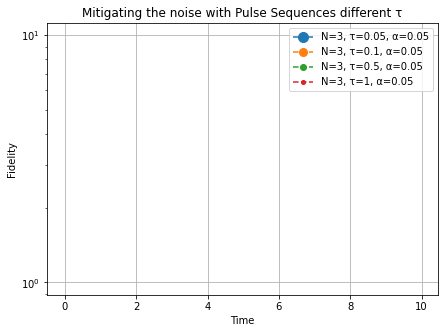

0.05
******************
alpha = 0.5
tau = 0.05
psi_nm.shape = (8,)
length of t = 200
length of uOp = 200
*************************************
0.1
******************
alpha = 0.5
tau = 0.1
psi_nm.shape = (8,)
length of t = 100
length of uOp = 100
*************************************
0.5
******************
alpha = 0.5
tau = 0.5
psi_nm.shape = (8,)
length of t = 20
length of uOp = 20
*************************************
1
******************
alpha = 0.5
tau = 1
psi_nm.shape = (8,)
length of t = 10
length of uOp = 10
*************************************


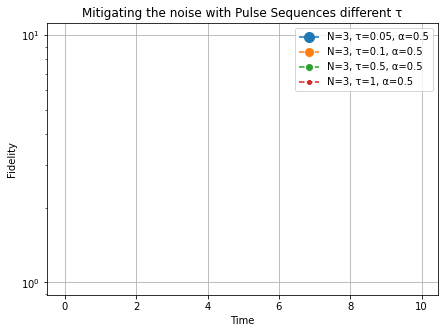

0.05
******************
alpha = 1
tau = 0.05
psi_nm.shape = (8,)
length of t = 200
length of uOp = 200
*************************************
0.1
******************
alpha = 1
tau = 0.1
psi_nm.shape = (8,)
length of t = 100
length of uOp = 100
*************************************
0.5
******************
alpha = 1
tau = 0.5
psi_nm.shape = (8,)
length of t = 20
length of uOp = 20
*************************************
1
******************
alpha = 1
tau = 1
psi_nm.shape = (8,)
length of t = 10
length of uOp = 10
*************************************


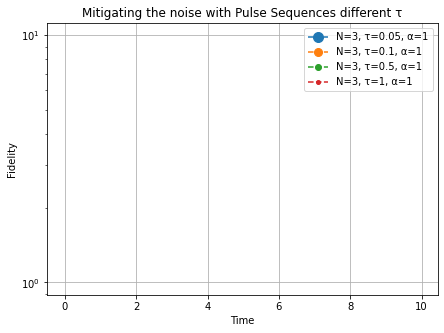

0.05
******************
alpha = 1.2
tau = 0.05
psi_nm.shape = (8,)
length of t = 200
length of uOp = 200
*************************************
0.1
******************
alpha = 1.2
tau = 0.1
psi_nm.shape = (8,)
length of t = 100
length of uOp = 100
*************************************
0.5
******************
alpha = 1.2
tau = 0.5
psi_nm.shape = (8,)
length of t = 20
length of uOp = 20
*************************************
1
******************
alpha = 1.2
tau = 1
psi_nm.shape = (8,)
length of t = 10
length of uOp = 10
*************************************


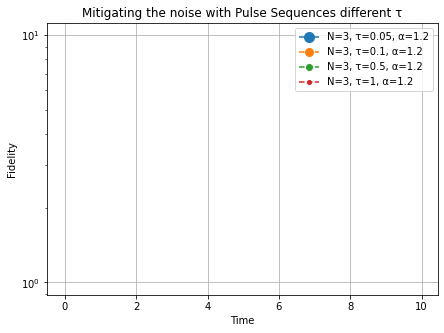

0.05
******************
alpha = 2
tau = 0.05
psi_nm.shape = (8,)
length of t = 200
length of uOp = 200
*************************************
0.1
******************
alpha = 2
tau = 0.1
psi_nm.shape = (8,)
length of t = 100
length of uOp = 100
*************************************
0.5
******************
alpha = 2
tau = 0.5
psi_nm.shape = (8,)
length of t = 20
length of uOp = 20
*************************************
1
******************
alpha = 2
tau = 1
psi_nm.shape = (8,)
length of t = 10
length of uOp = 10
*************************************


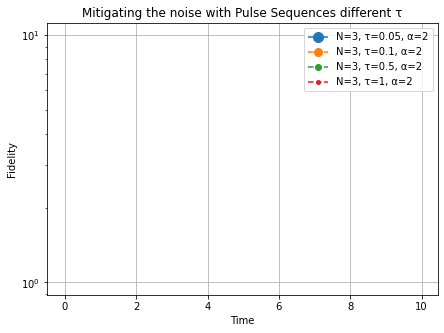

0.05
******************
alpha = 3
tau = 0.05
psi_nm.shape = (8,)
length of t = 200
length of uOp = 200
*************************************
0.1
******************
alpha = 3
tau = 0.1
psi_nm.shape = (8,)
length of t = 100
length of uOp = 100
*************************************
0.5
******************
alpha = 3
tau = 0.5
psi_nm.shape = (8,)
length of t = 20
length of uOp = 20
*************************************
1
******************
alpha = 3
tau = 1
psi_nm.shape = (8,)
length of t = 10
length of uOp = 10
*************************************


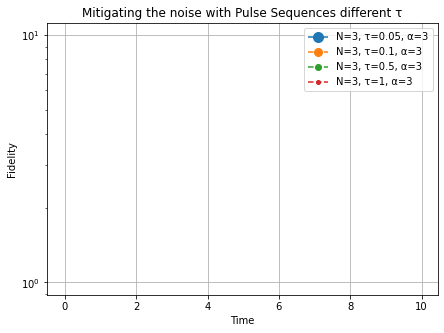

0.05
******************
alpha = 6
tau = 0.05
psi_nm.shape = (8,)
length of t = 200
length of uOp = 200
*************************************
0.1
******************
alpha = 6
tau = 0.1
psi_nm.shape = (8,)
length of t = 100
length of uOp = 100
*************************************
0.5
******************
alpha = 6
tau = 0.5
psi_nm.shape = (8,)
length of t = 20
length of uOp = 20
*************************************
1
******************
alpha = 6
tau = 1
psi_nm.shape = (8,)
length of t = 10
length of uOp = 10
*************************************


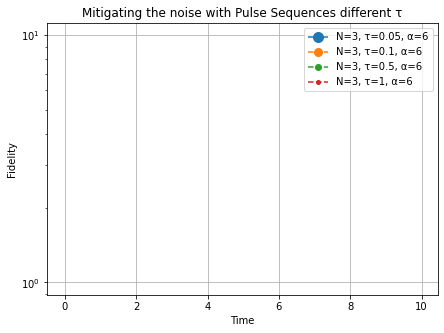

0.05
******************
alpha = 12
tau = 0.05
psi_nm.shape = (8,)
length of t = 200
length of uOp = 200
*************************************
0.1
******************
alpha = 12
tau = 0.1
psi_nm.shape = (8,)
length of t = 100
length of uOp = 100
*************************************
0.5
******************
alpha = 12
tau = 0.5
psi_nm.shape = (8,)
length of t = 20
length of uOp = 20
*************************************
1
******************
alpha = 12
tau = 1
psi_nm.shape = (8,)
length of t = 10
length of uOp = 10
*************************************


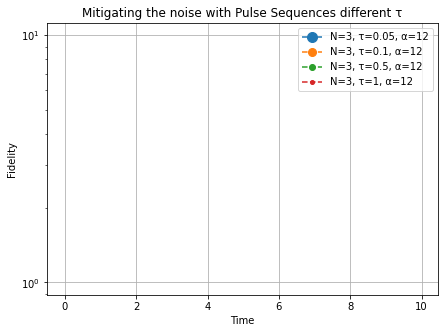

In [23]:

# def WPSeq_TimeEvolOp(params, **kwargs):
# Pseq, unitary_timeOp, timeOpPHrP = params['pulses'], [], np.eye(2**(params['N']))
# params['n'], tau_n_list = len(Pseq), []
# for alpha in [0.05, 0.5, 1, 1.2, 2, 3, 6, 12]:
#     params['alpha'] = alpha
#     Hr, expH_r = WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)
#     for k, p in enumerate(Pseq):
#         timeOpPHrP = np.linalg.inv(p)@expH_r@p@timeOpPHrP
#     t_list = np.arange(0, params['T'], params['tau'])
#     unitary_timeOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, t in enumerate(t_list)]
    #     return unitary_timeOp, t_list
params['alpha_list'] = [0.05, 0.5, 1, 1.2, 2, 3, 6, 12]
for alpha in params['alpha_list']:
    params['alpha'] = alpha
    mss = 10

    plt.figure(figsize=[7,5])
    for tau in params['tau_list']:
        params['tau'] = tau
        F = []
        uOp, t = WPSeq_TimeEvolOp(params)
        alphaf = params['alpha']
#         t = np.arange(0, params['T'], params['tau'])
        print(f'alpha = {alphaf}')
        print(f'tau = {tau}')
        print(f'psi_nm.shape = {psi_nm.shape}')
        print(f'length of t = {len(t)}')
#         uOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, _ in enumerate(t)]
        print(f'length of uOp = {len(uOp)}')
        print('*************************************')
        psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(uOp)]
        F = [1-np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
    #     print(F)
        plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}, α={params['alpha']}", ms=mss)
        mss -=2
        plt.yscale("log")
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Fidelity")
        plt.title("Mitigating the noise with Pulse Sequences different τ")
        plt.grid('on')
    plt.show()

In [24]:
# Pseq, unitary_timeOp, timeOpPHrP = params['pulses'], [], np.eye(2**params['N'])
# params['n'], timeOpPHrP_lst = len(Pseq), [] # timeOpPHrP_list stores timeOp_PHrP for each element from 0 to tau divided by n.
# Hr, expH_r = WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)
# #     print(unitary_timeOpH_r.shape)
# for k, p in enumerate(Pseq):
#      pass
        
# for k, p in enumerate(Pseq):
# #         print(p[0].shape)
#     if k == 0:
#         PexpHr = unitary_timeOpH_r @ p @ PexpHr
#         pexpHr_lst += [PexpHr]
#     elif k == len(Pseq)-1:
#         PexpHr = np.linalg.inv(p) @ unitary_timeOpH_r @ PexpHr
#         pexpHr_lst += [PexpHr]
#     else:
#         PexpHr = Pseq[k-1] @ np.linalg.inv(p) @ PexpHr
#         pexpHr_lst += [PexpHr]
# #         print(PexpHr.shape)
# #         print('*****************')
#     print(pexpHr_lst[0].shape)
#     pexpHr_lst += [PexpHr]
# t_list = np.arange(0, params['tau'], params['n'])
# #     unitary_timeOp = [np.linalg.matrix_power(PexpHr, i) for i, t in enumerate(t_list)]
# unitary_timeOp = [pexpHr_lst[i] for i, t in enumerate(t_list)]

In [25]:
# plt.figure(figsize=[7,5])

# for tau in params['tau_list']:
#     params['tau'] = tau
#     F = []
#     uOp, t, pexpHr_lst = WPSeq_TimeEvolOp(params)
#     psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(pexpHr_lst)]
#     F = [np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
#     print(F)
#     plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}, α={params['alpha']}", ms=mss)
#     mss -=2
#     plt.yscale("log")
#     plt.legend()
#     plt.xlabel("Time")
#     plt.ylabel("Fidelity")
#     plt.title("Mitigating the noise with Walsh Pulse Sequences different τ")
#     plt.grid('on')
# plt.show()

In [26]:
# Creating a Hamiltonian with given Operators in any form such as [[X, X, X], [X]]
def Hamilton(params, **kwargs):
    pass

In [27]:
lst = [(X, X, I), (I, X, X), (X, I, X), (Y, Y, I), (I, Y, Y), (Y, I, Y)]  # Check how to create arrays of matrices of same type and use it for creating Walsh Functions
# lst = [(X, X), (Y, Y)]
H = np.zeros((2**3, 2**3), dtype = complex)
# H = []
for i in lst:
#     H += [reduce(np.kron, i)]
    H += reduce(np.kron, i)
    
print(H)

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 2.+0.j 0.+0.j 2.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 2.+0.j 0.+0.j 0.+0.j 2.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 2.+0.j 2.+0.j 0.+0.j]
 [0.+0.j 2.+0.j 2.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 2.+0.j 0.+0.j 0.+0.j 2.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 2.+0.j 0.+0.j 2.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [28]:
lst = [X]*2
print(reduce(np.kron, lst))

[[0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]


In [29]:
l = []
for i in range(4, 9, 1):
    l += [i]
print(l)

[4, 5, 6, 7, 8]


In [30]:
np.array(list(itertools.zip_longest(*alist, fillvalue='dummy'))).T

NameError: name 'alist' is not defined

In [ ]:
# H = np.array([[1, 1], [1, -1]])

# def WF_Conditions(tupleprdt, **kwargs): # tupleprdt is a list
#     for i, tprdt in enumerate(tupleprdt):
#         if tprdt[0] == tprdt[1] == 1:
#             tupleprdt[i] = I
#         elif tprdt[0] == -tprdt[1] == 1:
#             tupleprdt[i] = X
#         elif -tprdt[0] == tprdt[1] == 1:
#             tupleprdt[i] = Y
#         elif tprdt[0] == tprdt[1] == -1:
#             tupleprdt[i] = Z
#     return tupleprdt   
# # print(WF_Conditions(tupleprdt = [(1,1), (1,-1)]))

# def WF_Generate(params, **kwargs):
#     N, lst, W_x, W_y, tupleprdt, q, lst = params['N'], [H], kwargs['W_x'], kwargs['W_y'], [], 0, []
#     H0, H1 = np.array([1]), H 
#     q = int(np.ceil(np.log2(max(W_x, W_y)+1)))
#     if q == 0:
#         lst = [H0]
#         tupleprdt.append((1, 1)) # Since if the max(wx, wy) is 0, then both are zero.
#     else:
#         lst = [H1]
#         for i in range(q-1):
#             lst.append(lst[i])
#         Hf = reduce(np.kron, lst)
#         wfx, wfy = Hf[W_x], Hf[W_y]
#         for i, h in enumerate(wfx):
#             tupleprdt.append((h, wfy[i]))
#     tupleprdt = WF_Conditions(tupleprdt)
#     return tupleprdt
# # print(WF_Generate(params, W_x = 3, W_y = 3))
    
# def WF_WIList(params, **kwargs):
#     W_x, W_y, tupleprdt, ps, Pseq = kwargs['W_x'], kwargs['W_y'], [], [], []
#     for i, w_x in enumerate(W_x):
#         tupleprdt.append(WF_Generate(params, W_x = w_x, W_y = W_y[i]))
#     ps = [[] for _ in range(len(max(tupleprdt,key=len)))]
#     padded_tupleprdt = list(zip(*itertools.zip_longest(*tupleprdt, fillvalue=I)))
#     for i, p in enumerate(ps):
#         for j, padded_ps in enumerate(padded_tupleprdt):
#             ps[i].append(padded_ps[i])
#     for i, p in enumerate(ps):
#         Pseq += [reduce(np.kron, p)]
#     return Pseq
# # print(len(WF_WIList(params, W_x = [1, 2, 3], W_y =  [1, 2, 3])))
# # print(WF_WIList(params, W_x = [1, 2, 3], W_y = [1, 2, 3]))

# def WPSresource_Hamiltonian_TimeEvolOp_IsingType(params, **kwargs):
#     N, opH, unitary_timeOp = params['N'], params['opH'], 0
#     H_r, R, r, alpha = np.zeros((2**N, 2**N), dtype = complex), params['R'], params['r'], params['alpha']
#     lst = [I for _ in range(N)]
#     for op in opH:
#         for i in range(N):
#             for j in range(i+1, N, 1):
#                 lst[i] = op
#                 lst[j] = op
#                 H_r += R[i]*reduce(np.kron, lst)/(np.power(np.abs(i-j), alpha))
#                 lst = [I for _ in range(N)]
#     tau = params['tau']
#     unitary_timeOp = expm((-1j*tau*H_r)/(params['n']))
#     return H_r, unitary_timeOp

In [ ]:
# def WPSeq_TimeEvolOp(params, **kwargs):
#     Pseq, unitary_timeOp, timeOpPHrP = params['pulses'], [], np.eye(2**(params['N']))
#     params['n'] = len(Pseq)
# #     print(params['tau'])
# #     print('******************')
#     Hr, expH_r = WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)
#     for k, p in enumerate(Pseq):
#         timeOpPHrP = np.linalg.inv(p) @ expH_r @ p @ timeOpPHrP
#     t_list = np.arange(0, params['T'], params['tau'])
#     unitary_timeOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, t in enumerate(t_list)]
#     return unitary_timeOp, t_list

In [ ]:
# max_index = 8
# W_x, W_y = list(range(1, max_index, 1)), list(range(1, max_index, 1))
# params['N'] = len(W_x)
# params['pulses'] = WF_WIList(params, W_x = W_x, W_y = W_y)
# params['n'] = len(params['pulses'])
# params['opH'] = [X, Y] 
# n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
# params['R'], params['r'], params['alpha'] = R, r, 2
# params['alpha_list'] = [0.5, 1, 1.2, 2, 3, 6, 12]

In [ ]:
# for alpha in params['alpha_list']:
#     Pseq, unitary_timeOp, timeOpPHrP = params['pulses'], [], np.eye(2**(params['N']))
#     params['n'] = len(Pseq)
#     mss = 10
#     params['alpha'] = alpha
#     for tau in params['tau_list']:
#         params['tau'] = tau
# #         uOp, t = WPSeq_TimeEvolOp(params)
#         Hr, expH_r = WPSresource_Hamiltonian_TimeEvolOp_IsingType(params)
#         for k, p in enumerate(Pseq):
#             timeOpPHrP = np.linalg.inv(p) @ expH_r @ p @ timeOpPHrP
#         t = np.arange(0, params['T'], params['tau'])
#         uOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, t in enumerate(t)]
#         psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(uOp)]
#         F = [1-np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
# #         print(F)
# #         print('***********************')
#         plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}, α={params['alpha']}", ms=mss)
#         mss -=3
#         plt.yscale("log")
#         plt.legend()
#         plt.xlabel("Time")
#         plt.ylabel("Fidelity")
#         plt.title("Mitigating the noise with Pulse Sequences different τ")
#         plt.grid('on')
#     plt.show()

In [ ]:
help()

# Section 3: A and B

In [12]:
H = np.array([[1, 1], [1, -1]])

def WF_PulseRotErr(params, **kwargs): 
    """
    **kwargs : We, required
        'We' is a list of Walsh Indices
    Returns: A list of columns from the
        generalized Hadamard Matrix
        corresponding to each index in
        We.
    """
    N, We = params['N'], kwargs['We']
    H0, H1, lst, q = np.array([1]), H, [], int(np.ceil(np.log2(np.max(We)+1)))
    lst = [H1]
    for i in range(q-1):
        lst.append(lst[i])
    Hf = reduce(np.kron, lst)
#     print(Hf)
    Wf_Qbit = [Hf[we] for we in W_e]
    return Wf_Qbit
# print(WF_PulseRotErr(params, W_e = [0, 1, 2, 3]))
        

# params['deltaErr_list'] = list(range(0, params['N'], 2))
# params['deltaErr_list'] = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0055, 0.0006, 0.0065, 0.0007, 0.0008]
# params['deltaErr_list'] = np.linspace(0.0000, 0.0001 * params['N'], params['N'])
params['deltaErr_list'] = np.arange(0, 0.0001 * params['N'], 0.0001)

W_x = [0, 1]
W_y = [0, 1]
Pseq = WF_WIList(params, Wx = W_x, Wy = W_y)
def pulse_rotationErrors(params, **kwargs): # eq21 from the paper
    """
    **kwargs : W_e, W_x, W_y required
        'W_f' is a list of Walsh Indices
    Returns: A list of sublists of PulseErrors stored corresponding to l'th index.
    """
    W_x, W_y, deltaErr_list, W_e = kwargs['W_x'], kwargs['W_y'], params['deltaErr_list'], kwargs['W_e']
    Pseq = WF_WIList(params, Wx = W_x, Wy = W_y)
    Pseq_Err, Wf_Qbit = [[] for _ in range(len(Pseq))], WF_PulseRotErr(params, W_e = W_e)
#     print(len(Pseq))
    for i, ps_err in enumerate(Pseq_Err):
        for j, si in enumerate(Wf_Qbit):
#             print(f'i,j = {i,j}',si[i])
            Pseq_Err[i] += [expm(-1j*(si[i])*(np.pi + deltaErr_list[j])*Pseq[j]/2)]
#             Pseq_Err[i] += [expm(-1j*(si[i])*(np.pi + deltaErr_list[j])*Pseq[j]/2)] # Stored l-wise
#             print(f'i,j={i,j}',Pseq_Err[i][j])
#             Pseq_Err[i] += [expm(-1j*(Wf_Qbit[i][j])*(np.pi + deltaErr_list[i])*Pseq[i]/2)] # Stored sitewise
    return Pseq_Err, Pseq
print(pulse_rotationErrors(params, W_x = [0, 1], W_y = [0, 1], W_e = [0, 1])[1])

def WF_TimeEvolOp_HRA_Err(params, **kwargs): # Equations 23
    W_x, W_y, W_e, delErr_lst = kwargs['W_x'], kwargs['W_y'], kwargs['W_e'], params['deltaErr_list']
    params['N'] = len(W_x)
    N, R = params['N'], params['R']
    Wf_x, Wf_y, Wf_e = WF_PulseRotErr(params, W_e = W_x), WF_PulseRotErr(params, W_e = W_y), WF_PulseRotErr(params, W_e = W_e)
    H_RAErr = np.zeros((2**N, 2**N), dtype = complex)
    Pseq_Err, Pseq = pulse_rotationErrors(params, W_x = W_x, W_y = W_y, W_e = W_e)
    params['n'], params['pulses'] = len(Pseq_Err), Pseq
    n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
    params['R'], params['r'] = R, r
#     print(Pseq[0].shape)
#     print(Pseq)
    timeOp_PHerrP, timeOp_HRAErr = np.ones((2**N, 2**N)), np.ones((2**N, 2**N))
    unitary_timeOp, pulses = [], np.zeros((2**N, 2**N))
#     lst_Y, lst_X, lst_Z = [Y for _ in range(N)], [X for _ in range(N)], [Z for _ in range(N)]
#     Y_N, X_N, Z_N = reduce(np.kron, lst_Y), reduce(np.kron, lst_X), reduce(np.kron, lst_Z)  
#     HXij, HYij = np.zeros((2**N, 2**N), dtype = complex), np.zeros((2**N, 2**N), dtype = complex)
#     HXji, HYji = np.zeros((2**N, 2**N), dtype = complex), np.zeros((2**N, 2**N), dtype = complex)
    HXij, HYij = np.zeros((2, 2), dtype = complex), np.zeros((2, 2), dtype = complex)
    HXji, HYji = np.zeros((2, 2), dtype = complex), np.zeros((2, 2), dtype = complex)
#     print(f'HYji.shape = {HYji.shape}')
    lst1, lst2 = [I for _ in range(N)], [I for _ in range(N)]
    Hra_lst = []
#     print(Y_N.shape)
#     print(params['N'])
#     print(Wf_e[0][1])
#     print(H_RAErr.shape)
    for l in range(len(W_e)):
        for op in params['opH']:
            for i in range(params['N']):
                for j in range(i+1, params['N'], 1):
                    for k in range(params['n']):
#                         print('Blablabla....................Blablabla....................Blablabla....................')
                        if np.array_equal(op, X) == True:
#                             print('Blablabla....................Blablabla....................Blablabla....................')
                            HXij += ((1-Wf_x[i][k])/2)*Wf_x[j][k]*((((1-Wf_y[i][k])/2)*Y) - (((1+Wf_y[i][k])/2)*Z))
                            HXji += ((1-Wf_x[j][k])/2)*Wf_x[i][k]*((((1-Wf_y[j][k])/2)*Y) - (((1+Wf_y[j][k])/2)*Z))
#                             print(f'HXij.shape = {HXij.shape}')
                        elif np.array_equal(op, Y) == True:
#                             print(f'HYji.shape = {HYji.shape}')
                            HYij += ((1-Wf_y[i][k])/2)*Wf_y[j][k]*((((1+Wf_x[i][k])/2)*Z) - (((1-Wf_x[i][k])/2)*X))
                            HYji += ((1-Wf_y[j][k])/2)*Wf_y[i][k]*((((1+Wf_x[j][k])/2)*Z) - (((1-Wf_x[j][k])/2)*X))
                    HXij, HYij, HXji, HYji  = HXij/params['n'], HYij/params['n'], HXji/params['n'], HYji/params['n']
                    if np.array_equal(op, X)== True:
                        lst1[i], lst1[j] = HXij, op
                        lst2[i], lst2[j] = op, HXji
#                         print(f'reduce(np.kron, lst1).shape = {reduce(np.kron, lst1).shape}')
                        H_RAErr += (R[i]/(np.power(np.abs(i-j), alpha)))*(delErr_lst[i]*reduce(np.kron, lst1) + 
                                                                          delErr_lst[j]*reduce(np.kron, lst2))

#                         H_RAErr += (R[i]/(np.power(np.abs(i-j), alpha)))*(delErr_lst[i]*Wf_e[i][l]*reduce(np.kron, lst1) + 
#                                                                           delErr_lst[j]*Wf_e[j][l]*reduce(np.kron, lst2))
                    elif np.array_equal(op, Y)== True:
                        lst1[i], lst1[j] = HYij, op
                        lst2[i], lst2[j] = op, HYji
                        H_RAErr += (R[i]/(np.power(np.abs(i-j), alpha)))*(delErr_lst[i]*reduce(np.kron, lst1) + 
                                                                          delErr_lst[j]*reduce(np.kron, lst2))
#                         H_RAErr += (R[i]/(np.power(np.abs(i-j), alpha)))*(delErr_lst[i]*Wf_e[i][l]*reduce(np.kron, lst1) + 
#                                                                           delErr_lst[j]*Wf_e[j][l]*reduce(np.kron, lst2))
                    lst1, lst2 = [I for _ in range(params['N'])], [I for _ in range(params['N'])]
                    HXij, HYij = np.zeros((2, 2), dtype = complex), np.zeros((2, 2), dtype = complex)
                    HXji, HYji = np.zeros((2, 2), dtype = complex), np.zeros((2, 2), dtype = complex)
#         print(H_RAErr.dtype)
        Hra_lst +=[H_RAErr]
        timeOp_HRAErr = expm(-1j*H_RAErr*params['tau']/params['n'])
#         print(f'Pseq_Err[l][0].shape = {Pseq_Err[l][0].shape}')
        pulses = reduce(np.matmul, Pseq_Err[l])
#         print(f'pulses.shape = {pulses.shape}')
#         print(f'timeOp_HRAErr.shape = {timeOp_HRAErr.shape}')
        timeOp_PHerrP = np.linalg.inv(pulses) @ timeOp_HRAErr @ pulses @ timeOp_PHerrP
    t_list = np.arange(0, params['T'], params['tau']) 
    unitary_timeOp = [np.linalg.matrix_power(timeOp_PHerrP, i) for i, t in enumerate(t_list)]
#     print(f'sum={sum(Hra_lst)}')
    return unitary_timeOp, t_list

# WF_TimeEvolOp_HRA_Err(params, W_x =[0,1], W_y = [0,1], W_e = [0,1])
            
   


KeyError: 'We'

In [41]:
def WF_WIList(params, **kwargs):
    """
    **kwargs: 'Wx', 'Wy' [Required] - list consisting the 
    index of x, y part of each qubit.
    'WF_We' [Optional] - used for generating pulses 
    with rotational errors.
    Returns: Pseq - Pulse sequence.
    """
    Wx, Wy, lstPaulOp, Pseq = kwargs['Wx'], kwargs['Wy'], [], []
    q = int(np.ceil(np.log2(max(max(Wx, Wy))+1)))
#     print(q)
    for i, wx in enumerate(Wx):
#         print(f'Tuple at i={i}')
        lstPaulOp += [WF_Generate(params, wx = wx, wy = Wy[i], q = q)]
#     padded_lstPaulOp = list(zip(*itertools.zip_longest(*lstPaulOp, fillvalue=I)))
#     print(f'padded_lstPaulOp = {padded_lstPaulOp}')
    pseq_k = [[] for _ in range(len(lstPaulOp[0]))]
    for i, ps_k in enumerate(pseq_k):
        for j, paulop in enumerate(lstPaulOp):
                if 'WF_We' in kwargs:
#                     delt = params['deltaErr_list']
#                     WFwe = kwargs['WF_We']
#                     print(delt)
#                     print(f'params[deltaErr_list][qbit={j}]={delt[j]}')
#                     print(f'kwargs[WF_We][qbit={j}]={WFwe[j]}')
                    
                    pseq_k[i] += [expm(-1j*paulop[i]*(np.pi + params['deltaErr_list'][j])*kwargs['WF_We'][j]/2)]
                else:
                    pseq_k[i] += [paulop[i]]
#                 print(f'At k={i}, qbit={j}, pseq_k ={pseq_k[i][j]}')
#                 print(f'lst[k={i}][qbit={j}]={lst[i][j]}')
#     print('--------------------------------------------------------------------------')
    for i, ps_k in enumerate(pseq_k):
        Pseq += [reduce(np.kron, ps_k)]
#         print(f'Pseq_{i} = {Pseq[i]}')
#         print(f'pulse_list_{i} = {reduce(np.kron, lst[i])}')
#         print('*********************')
    return Pseq
# params['deltaErr_list'] = [0.001, 0.002]
# max_index = 2
# params['N'] = max_index
# params['deltaErr_list'] = np.linspace(0.0000, 0.0001 * params['N'], params['N'])
# print(params['deltaErr_list'])
# # params['WF_We'] = WF_PulseRotErr(params, We = list(range(0, max_index, 1)))
# We = list(range(1, max_index+2, 1))
# params['WF_We'] = WF_Generate(params, We = We)
# print(params['WF_We'])
# P = []
# for i in params['WF_We']:
#     P += [WF_WIList(params, Wx = [0, 1], Wy = [0, 1], WF_We = i)]
# #     print(f'l={i}:\n P_{i}={P}')
# print(P[0])
# print(P[1])
# print(P[2])

max_index = 8
params['N'] = max_index
Wx, Wy, We = list(range(0, max_index, 1)), list(range(0, max_index, 1)), list(range(1, max_index+1, 1))
params['deltaErr_list'] = np.linspace(0.0000, 0.0001 * params['N'], 2*params['N'])
# print(params['deltaErr_list'])
params['WF_We'] = WF_Generate(params, We = We)
P = []
for i in params['WF_We']:
    P += [WF_WIList(params, Wx = Wx, Wy = Wy, WF_We = i)]
params['pulses'] = P
params['WFx'], params['WFy'] = WF_Generate(params, We = Wx), WF_Generate(params, We = Wy)
# params['deltaErr_list'] = [0.01, 0.02, 0.03, 0.04, 0.05, 0.55, 0.06, 0.65, 0.07, 0.08]
params['alpha_list'] = [0.05, 0.5, 1, 2, 3, 6]


H = np.array([[1, 1], [1, -1]])
# params['deltaErr_list'] = np.linspace(0.0000, 0.0001 * params['N'], 2*params['N'])
# params['deltaErr_list'] = np.arange(0, 0.0001 * params['N'], 0.0001)

# def WF_PulseRotErr(params, **kwargs):
#     """
#     **kwargs : We, required
#         'We' is a list of Walsh Indices
#     Returns: A list of columns from the
#         generalized Hadamard Matrix
#         corresponding to each index in
#         We.
#     """
#     N, We = params['N'], kwargs['We']
#     H0, H1, lst, q = np.eye(1), H, [], int(np.ceil(np.log2(np.max(We)+1)))
#     if q == 0:
#         lst = [H0]
#     else:
#         lst = [H1]
#         for i in range(q-1):
#             lst += [H1]
#     Hf = reduce(np.kron, lst)
# #     print(Hf)
#     Wf_Qbit = [Hf[we] for we in We]
#     return Wf_Qbit
# print(WF_PulseRotErr(params, We = [0, 1, 2, 3]))

# max_index = 4
# params['n'] = 4
# Wx, Wy = list(range(0, max_index, 1)), list(range(0, max_index, 1))
# params['WF_We'] = WF_Generate(params, We = list(range(0, max_index, 1)))
# params['WFx'], params['WFy'] = WF_Generate(params, We = Wx), WF_Generate(params, We = Wy)

# def PulseRottErr(params, **kwargs):
#     """
#     **kwargs: Wx, Wy - list consisting the 
#     index of x, y part of each qubit.
#     Returns: Pseq - Pulse sequence.
#     """
#     Wx, Wy, lstPaulOp, Pseq = kwargs['Wx'], kwargs['Wy'], [], []
#     q = int(np.ceil(np.log2(max(max(Wx, Wy))+1)))
# #     print(q)
#     for i, wx in enumerate(Wx):
# #         print(f'Tuple at i={i}')
#         lstPaulOp += [WF_Generate(params, wx = wx, wy = Wy[i], q = q)]
# #     print(f'padded_lstPaulOp = {padded_lstPaulOp}')
#     pseq_k = [[] for _ in range(len(lstPaulOp[0]))]
#     for i, ps_k in enumerate(pseq_k):
#         for j, paulop in enumerate(lstPaulOp):
#             pseq_k[i] += [expm(-1j*paulop[i]*(np.pi + params['deltaErr_list'][j])*kwargs['wf_we'][j]/2)]
# #         print(f'pseq_k at i={i, pseq_k[i]}')
#     for i, ps_k in enumerate(pseq_k):
#         Pseq += [reduce(np.kron, ps_k)]
#     return Pseq

def XijYij(params, **kwargs):
    """
    **kwargs: 'i' and 'j' indices, 'op' [Required]
    to construct eq23.
    Returns: Xij, Yij.
    """
    Xij, Yij = np.zeros((2, 2), dtype = complex), np.zeros((2, 2), dtype = complex)
    WFx, WFy = params['WFx'], params['WFy']
    i, j = kwargs['i'], kwargs['j']
#     print(f'WFx={WFx}')
#     print(f'WFy={WFy}')
    for k in range(params['n']):
        if np.array_equal(kwargs['op'], X) == True:
#             print(f'At i={i}, j={j}, k={k+1}')
            a = ((1-WFx[i][k])/2)*(WFx[j][k])
            b = ((1-WFy[i][k])*Y/2)
            c = ((1+WFy[i][k])*Z/2)
            Xij += a*(b-c)
#             print(f'a={a}, \nb={b}, \nc={c}, \nab={a*b}, \nac={a*c}\n')
#             print(f'X_{i}{j}[k={k+1}] = {Xij}')
#             print('*******************************************************************************')
#             print(f'WFx={WFx[i]}')
#             print(f'At j={j}, k={k}')
#             print(f'WFx={WFx[j]}')
#             print(f'WFx[i={i}][k={k}]={WFx[i][k]}')
#             print(f'WFy[i={i}][k={k}]={WFy[i][k]}')
#             print(f'WFx[j={j}][k={k}]={WFx[j][k]}'
#             Xij += ((1-WFx[i][k])/2)*(WFx[j][k])*(((1-WFy[i][k])*Y/2)-((1+WFy[i][k])*Z/2))
#             print(f'X_{i}{j}[k={k+1}] = {Xij}')
        elif np.array_equal(kwargs['op'], Y) == True:
            a = ((1-WFy[i][k])/2)*(WFy[j][k])
            b = ((1+WFx[i][k])*Z/2)
            c = ((1-WFx[i][k])*X/2)
            Yij += a*(b-c)
#             Yij += (1/4)*(1-WFy[kwargs['i']][k])*WFy[kwargs['j']][k]*(((1+WFx[kwargs['i']][k])*Z)-((1-WFx[kwargs['i']][k])*X))
    Xij, Yij = Xij/params['n'], Yij/params['n']
#     print(f'Xij={Xij}')
    return Xij, Yij
# FF = XijYij(params, i = 1, j = 2, op = Y)
# print(FF[0])
# print(FF[1])

def HRA_Err(params, **kwargs):
    """
    **kwargs: 'si' [Required] - WF at k-th interval
    for each qubit.
    Returns: Hr - Hamiltonian at k-th interval.
    """
    N, R, delt, s_list = params['N'], params['R'], params['deltaErr_list'], params['WF_We']
    Hr, lst1, lst2 = np.zeros((2**N, 2**N), dtype = complex), [I for _ in range(N)], [I for _ in range(N)]
    si = kwargs['si']
    for i in range(N):
        for j in range(i+1, N, 1):
            for op in params['opH']:
                if np.array_equal(op, X) == True:
                    lst1[i], lst1[j] = XijYij(params, i = i, j = j, op = op)[0], op 
                    lst2[i], lst2[j] = op, XijYij(params, i = j, j = i, op = op)[0]
                elif np.array_equal(op, Y) == True:
                    lst1[i], lst1[j] = XijYij(params, i = i, j = j, op = op)[1], op 
                    lst2[i], lst2[j] = op, XijYij(params, i = j, j = i, op = op)[1]
                Hr += np.abs(R[i])*((delt[i]*si[i]*reduce(np.kron, lst1))+
                                         (delt[j]*si[j]*reduce(np.kron, lst2)))/(np.power(np.abs(i-j), params['alpha']))
                lst1, lst2 = [I for _ in range(N)], [I for _ in range(N)]
    return Hr

# params['WF_We'] = WF_Generate(params, We = Wx)
# params['pulses'] = WF_WIList(params, Wx = Wx, Wy = Wy, WF_We = params['WF_We'])
def RotErr_doubleAvg(params, **kwargs):
    Pseq, unitary_timeOp, timeOpPHrP = params['pulses'], [], np.eye(2**(params['N']))
    s_list, Hr, expHr = params['WF_We'], 0, []
    for l, si in enumerate(s_list):
        Hr = HRA_Err(params, si = si)
        expHr += [expm(-1j*Hr*params['tau']/params['n'])]
    for i, exphr in enumerate(expHr):
        for j, pl in enumerate(Pseq):
            for p in pl:
                timeOpPHrP = np.linalg.inv(p) @ exphr @ p @ timeOpPHrP
    #     print(timeOpPHrP)
    t_list = np.arange(0, params['T'], params['tau'])
    unitary_timeOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, t in enumerate(t_list)]
    return unitary_timeOp, t_list

params['tp'] = 0.001
def finitePulseErr(params, **kwargs): 
    '''
    Returns eq25 with and without l's 
    '''
    N = params['N']
    WF_We, Hp, tp = params['WF_We'], np.zeros((2**(params['N']), 2**(params['N']))), params['tp']
    if 'WF_We' in kwargs:
        for i in WF_We:
            for j in range(N-1):
                Hp+= (np.pi/tp)*(i[j])

In [15]:
print(0.0*(Y-Z))

[[-0.+0.j  0.-0.j]
 [ 0.+0.j  0.+0.j]]


In [15]:
q = int(np.ceil(np.log2(100)))
print(q)
lst = [H]
for i in range(q-1):
    lst += [H]
print(reduce(np.kron, lst).shape)

7
(128, 128)


[0.8548966361063381, 0.8796356706393289, 0.8608916593317348, 0.8763823010879642, 0.8631023914792423, 0.8912509381337456, 1.0, 0.8679157187913116]


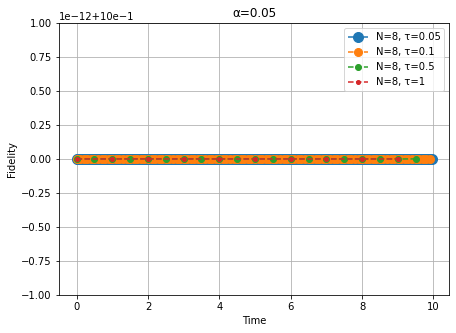

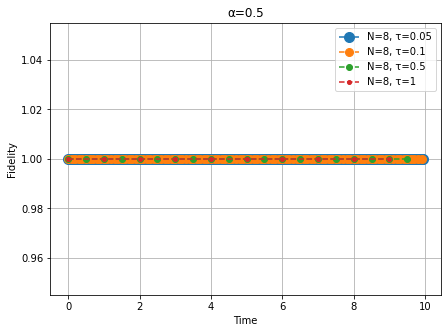

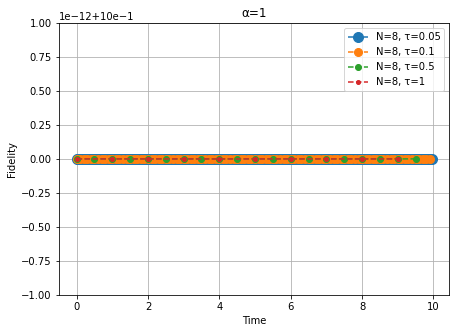

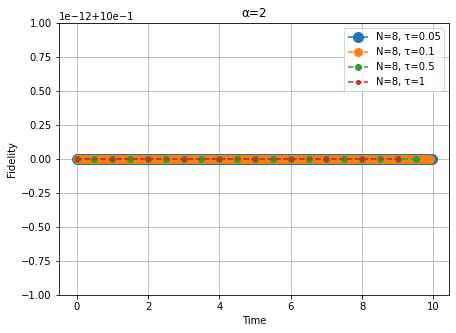

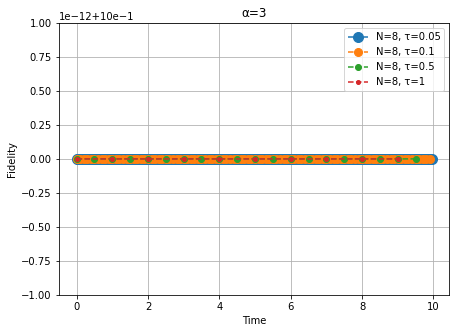

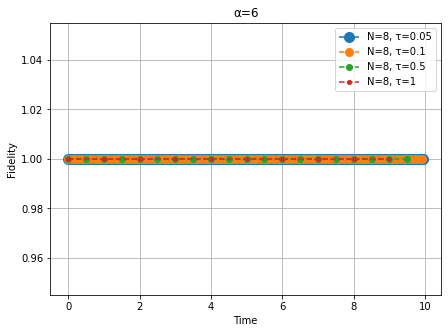

In [42]:
max_index = 8
params['N'] = max_index
params['deltaErr_list'] = np.linspace(0.0000, 0.0001 * params['N'], 2*params['N'])
Wx, Wy, We = list(range(0, max_index, 1)), list(range(0, max_index, 1)), list(range(1, max_index+1, 1))
params['WF_We'] = WF_Generate(params, We = We)
P = []
for i in params['WF_We']:
    P += [WF_WIList(params, Wx = Wx, Wy = Wy, WF_We = i)]
params['pulses'] = P
params['WFx'], params['WFy'] = WF_Generate(params, We = Wx), WF_Generate(params, We = Wy)
n, N, r, op, pulses, psi_nm, R, alpha = initialVals(params)
print(R)
# params['deltaErr_list'] = [0.01, 0.02, 0.03, 0.04, 0.05, 0.55, 0.06, 0.65, 0.07, 0.08]
params['alpha_list'] = [0.05, 0.5, 1, 2, 3, 6]
for alpha in params['alpha_list']:
    params['alpha'] = alpha
    mss = 10

    plt.figure(figsize=[7,5])
    for tau in params['tau_list']:
        params['tau'] = tau
        F = []
        uOp, t = RotErr_doubleAvg(params, W_x = W_x, W_y = W_y, W_e = W_x)
        alphaf = params['alpha']
#         t = np.arange(0, params['T'], params['tau'])
#         print(f'alpha = {alphaf}')
#         print(f'tau = {tau}')
#         print(f'psi_nm.shape = {psi_nm.shape}')
#         print(f'length of t = {len(t)}')
#         uOp = [np.linalg.matrix_power(timeOpPHrP, i) for i, _ in enumerate(t)]
#         print(f'length of uOp = {len(uOp)}')
#         print('*************************************')
        psi_t = [normalizeWF(u@psi_nm) for i,u in enumerate(uOp)]
        F = [np.power(np.abs(np.vdot(psi_nm, pt)), 2) for pt in psi_t]
    #     print(F)
        plt.plot(t, F, "--o", label = f"N={params['N']}, τ={tau}", ms=mss)
        mss -=2
#         plt.yscale("log")
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Fidelity")
#         plt.title(f"Mitigating the noise with Pulse Sequences different τ, α={params['alpha']}")
        plt.title(f"α={params['alpha']}")
        plt.grid('on')
    plt.show()

In [ ]:
# def WF_TimeEvolOp_HRA_Err(params, **kwargs): # This gives timeOp for H_RA, ERR
#     opH, R, alpha, W_x, W_y, W_e = params['opH'], params['R'], params['alpha'], kwargs['W_x'], kwargs['W_y'], kwargs['W_e']
#     Pseq_Err = pulse_rotationErrors(params, W_x = W_x, W_y = W_y, W_e = W_e)
#     params['n'] = len(Pseq_Err)
    
#     pass
    
# What I have to do is create another function that creates a list of wf for different qubits that happen at l'th time 
# and, then send them in for each value of l for different qubits. 
# After I do it for one period that is period l, I do it for T/tau times where tau is the time evolution for Hr,
# and this is repeated for T/tau times - this would be my final unitary_timeOp.
# Question here is should I evolve avg error Hamiltonian or the the hamiltonian itself?
# Yes, I think because I am doing this to get rid of errors due to this avg error H.

In [ ]:
def WF_TimeEvolOp(params, **kwargs):
    pass

In [78]:
print(expm(-1j*(-1)*(np.pi + params['deltaErr_list'][1])*Pseq[1]/2))

[[-0.01999867+0.99980001j  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j         -0.01999867-0.99980001j  0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.01999867+0.99980001j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  -0.01999867-0.99980001j]]


In [62]:
W_e = [1, 2, 5, 4]
print(max(W_e))

5


In [211]:
a = np.array([[1, 1], [1, 1]])
b = np.array([[2, 3], [1, 0]])
print(a@b)
lst = [a, b]
print(reduce(np.matmul, lst))

[[3 3]
 [3 3]]
[[3 3]
 [3 3]]


In [220]:
# print((X+Y+Z) @ (X-Y-Z) - (X-Y-Z) @ (X+Y+Z)) #1, 2
# print((X+Y+Z) @ (-X-Y+Z) - (-X-Y+Z) @ (X+Y+Z)) #1, 3
# print((X+Y+Z) @ (-X+Y-Z) - (-X+Y-Z) @ (X+Y+Z)) #1, 4
# print((X-Y-Z) @ (-X-Y+Z) - (-X-Y+Z) @ (X-Y-Z)) #2, 3
# print((X-Y-Z) @ (-X+Y-Z) - (-X+Y-Z) @ (X-Y-Z)) #2, 4
# print((-X-Y+Z) @ (-X+Y-Z) - (-X+Y-Z) @ (-X-Y+Z)) #3, 4

print(((X+Y+Z) @ (X-Y-Z) - (X-Y-Z) @ (X+Y+Z)) + ((X+Y+Z) @ (-X-Y+Z) - (-X-Y+Z) @ (X+Y+Z)) + ((X+Y+Z) @ (-X+Y-Z) - (-X+Y-Z) @ (X+Y+Z))
+ ((X-Y-Z) @ (-X-Y+Z) - (-X-Y+Z) @ (X-Y-Z)) + ((X-Y-Z) @ (-X+Y-Z) - (-X+Y-Z) @ (X-Y-Z)) + ((-X-Y+Z) @ (-X+Y-Z) - (-X+Y-Z) @ (-X-Y+Z)))

[[0.-8.j 0.+0.j]
 [0.+0.j 0.+8.j]]


In [213]:
# print((X+Y) @ (X-Y) - (X-Y) @ (X+Y))

[[0.-4.j 0.+0.j]
 [0.+0.j 0.+4.j]]


In [214]:
# print((Y@X) - (X@Y))

[[0.-2.j 0.+0.j]
 [0.+0.j 0.+2.j]]


In [3]:
print(reduce(np.kron, [H, H]))

[[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]]


In [4]:
x = 10
def my_function(x):
    return x * 2


In [6]:
x = 5
result = my_function(x)
print(result) 

10


In [7]:
result = my_function(x=3)
print(result) 

6


# Bose-Hubbard Model

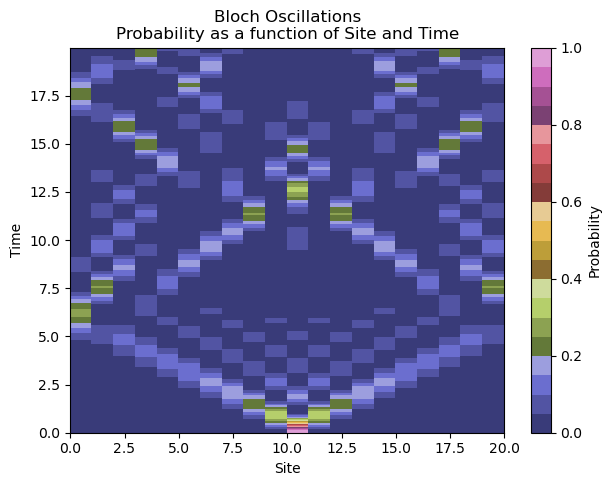

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

params = {
    'N': 21, # no. of sites
    't':1.0,
    'localized_site': 10,
    'T': 20,
    'tau': 0.01
}

psi0 = np.zeros(params['N'], dtype=complex)
psi0[params['localized_site']] = 1.0
N = params['N']
t_list, psi_t = np.arange(0, params['T'], params['tau']), []
# t_list = np.linspace(0, 10, 100)
H = np.zeros((N, N), dtype=complex)
for i in range(N-1):
    H[i][i+1], H[i+1][i] = -params['t'], -params['t']
for i, t in enumerate(t_list):
    U = expm(-1j*H*t)
    psi_t +=  [U@psi0]

probabilities = np.abs(np.array(psi_t))**2
site_list = list(range(0, params['N'], 1))
# Plotting heatmap
plt.figure(figsize=[7, 5])
p = plt.get_cmap('tab20b')
# plt.imshow(probabilities, aspect='auto', origin='lower', extent=[0, params['N'], 0, params['T']], cmap='crest')
# t_list = list(reversed(t_list))
# probabilities = probabilities[::-1]
plt.pcolormesh(site_list, t_list, probabilities, cmap=p)
plt.colorbar(label='Probability') #need a colorbar to show the intensity scale
# plt.show() #boom
# plt.colorbar(label='Probability')
plt.xlabel('Site')
plt.ylabel('Time')
plt.title('Bloch Oscillations\nProbability as a function of Site and Time')
plt.show()

# plt.figure(figsize=[7,5])
# for i in range(params['N']):
#     prob = [np.abs(psi[i])**2 for psi in psi_t]
#     plt.plot(t_list, prob, label=f"Site {i}")
#     plt.legend()
#     plt.xlabel("Time")
#     plt.ylabel("Probability")
#     plt.title(f"Probability as a function of Time for each site")
#     plt.grid('on')
#     prob = []
# plt.show()

#     fig, ax = plt.subplots()

#     c = ax.pcolormesh(t_list, [i for i in range(param['N'])], prob, cmap='RdBu', vmin=z_min, vmax=z_max)
#     ax.set_title('pcolormesh')
#     # set the limits of the plot to the limits of the data
#     ax.axis([x.min(), x.max(), y.min(), y.max()])
#     fig.colorbar(c, ax=ax)

# plt.show()

#############################################################
#############################################################

#############################################################
#############################################################
# n, site, t, psi_t = 10, 5, 1.0, []
# H = np.zeros((n, n), dtype=complex)
# for i in range(n-1):
#     H[i, i+1] = -t
#     H[i+1, i] = -t


# psi0 = np.zeros(n, dtype=complex)
# psi0[site] = 1.0

# times = np.linspace(0, 10, 100)
# evolution = []
# for t in times:
#     U = expm(-1j * H * t)
#     psi_t += [U@psi0]
# #     evolution.append(psi_t)
# print(t_list)
# print(times)

# fig, ax = plt.subplots()
# for i in range(n):
#     probabilities = [np.abs(psi[i])**2 for psi in psi_t]
#     ax.plot(times, probabilities, label=f'Site {i}')
# ax.set_xlabel('Time')
# ax.set_ylabel('Probability')
# ax.legend()
# plt.show()


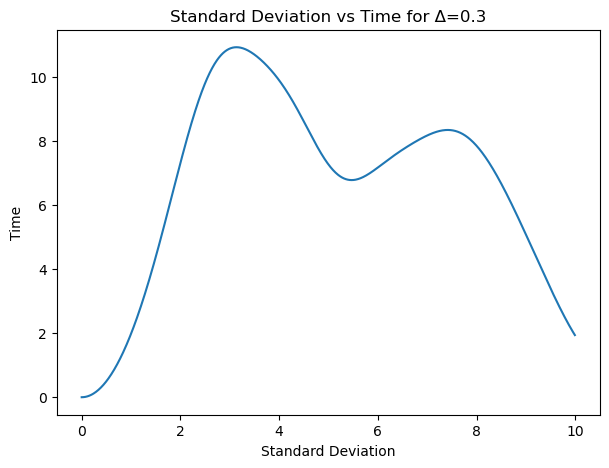

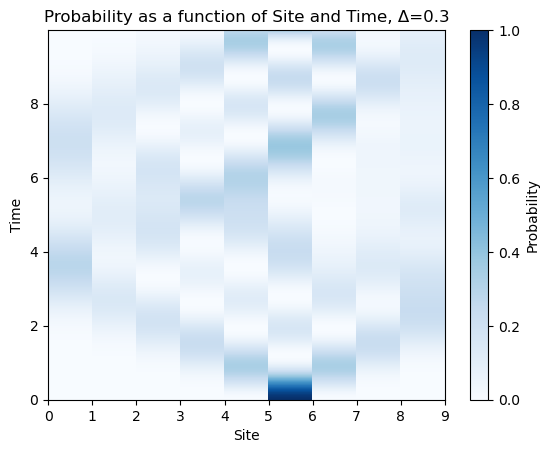

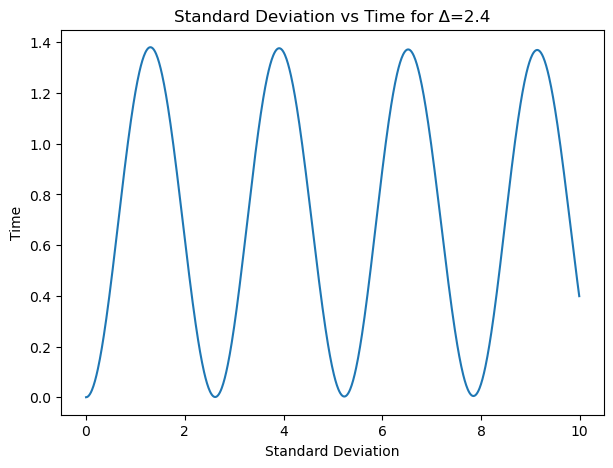

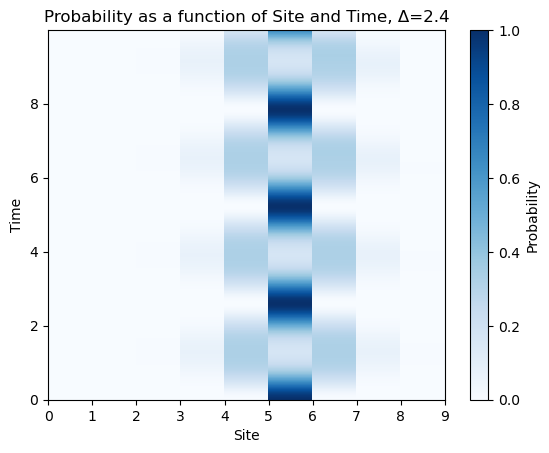

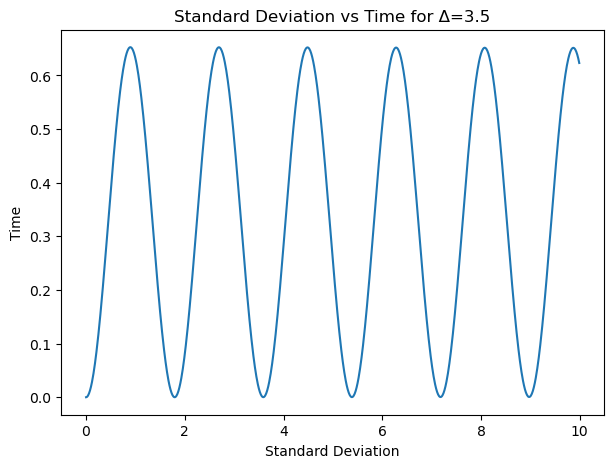

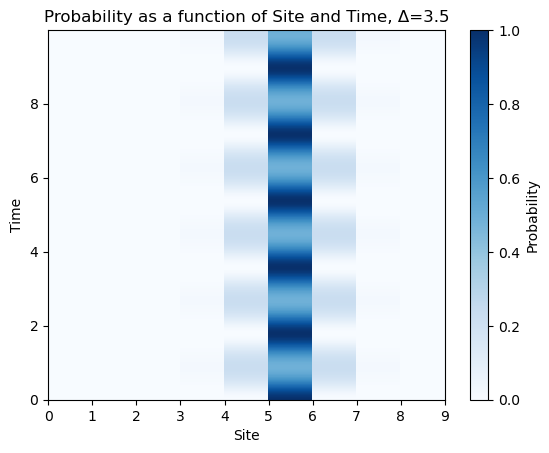

In [3]:
params = {
    'N': 10, # no. of sites
    't':1.0,
    'localized_site1': 5,
    'T': 10,
    'tau': 0.01
}

psi0 = np.zeros(params['N'], dtype=complex)
psi0[params['localized_site1']] = 1.0
N = params['N']
params['deltA_list'] = [0.3, 2.4, 3.5] 
t_list, psi_t = np.arange(0, params['T'], params['tau']), []
std_devj=0
for deltA in params['deltA_list']:
    t_list, psi_t = np.arange(0, params['T'], params['tau']), []
    params['deltA'] = deltA
    H = np.zeros((N, N), dtype=complex)
    for i in range(N-1):
        H[i][i+1], H[i+1][i] = -params['t'], -params['t']
        H[i][i] = i*params['deltA']
    for i, t in enumerate(t_list):
        U = expm(-1j*H*t)
        psi_t +=  [U@psi0]

    probabilities = np.abs(np.array(psi_t))**2
    # print(repr(probabilities))
    # print(np.std(probabilities[0]))
    site_list = list(range(0, params['N'], 1))
    plt.figure(figsize=[7, 5])
    p = plt.get_cmap('Blues')
    std_deviation = []
    for i, prob in enumerate(probabilities):
        for j, pj in enumerate(prob):
            std_devj += ((j-params['localized_site1'])**2)*pj
    #     print(f'sum_prob_row-wise_time={i}={sum(prob)}')
        std_deviation += [std_devj]
        std_devj=0
    plt.plot(t_list, std_deviation)
    plt.xlabel('Standard Deviation')
    plt.ylabel('Time')
    plt.title(f'Standard Deviation vs Time for Δ={deltA}')
    plt.show()
    plt.pcolormesh(site_list, t_list, probabilities, cmap=p)
    plt.colorbar(label='Probability') 
    plt.xlabel('Site')
    plt.ylabel('Time')
    plt.title(f'Probability as a function of Site and Time, Δ={deltA}')
    plt.show()


In [70]:
def create_heatmap(X, Y, probabilities):
    # Convert input lists to numpy arrays for easier manipulation
#     X = np.array(X)
#     Y = np.array(Y)
#     probabilities = np.array(probabilities)
    print(f'X={X}')
    print(f'Y={Y}')
    probability = []
    for i, prob in enumerate(probabilities):
        probability += [float((np.abs(prob))**2)]
#     print(probability)
    print(f'prob={probability}\n')
    plt.figure(figsize=[7, 5])
    p = plt.get_cmap('Blues')
    
    colors = ['#747FE3', '#8EE35D', '#E37346']
    sns.scatterplot(x=X, y = Y, hue=probability, palette="viridis")

#     x_unique = np.unique(X)
#     y_unique = np.unique(Y)
#     heatmap_data = np.zeros((len(y_unique), len(x_unique)))

#     # Create a mapping from value to index for fast lookup
#     x_index = {value: idx for idx, value in enumerate(x_unique)}
#     y_index = {value: idx for idx, value in enumerate(y_unique)}

#     # Fill the heatmap data
#     for (x, y, prob) in zip(X, Y, probabilities):
#         i = y_index[y]
#         j = x_index[x]
#         heatmap_data[i, j] = (np.abs(prob))**2

#     plt.heatmap(heatmap_data, cmap=p)
#     sns.scatterplot(x=X, y = Y, hue=probabilities)
    plt.xlabel('Site i')
    plt.ylabel('Site j')
    mu = params['mu']
    plt.title(f'Probability as a function of Sites i and j, Δ={mu}')
#     plt.colorbar(label='Probability') 
    plt.show()

X=[0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0

<Figure size 504x360 with 0 Axes>

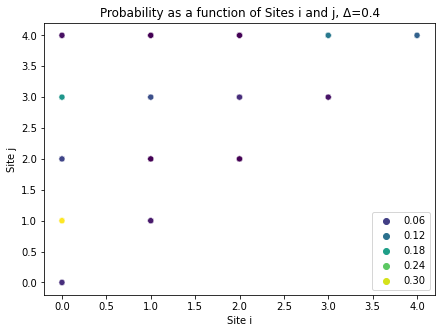

X=[0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0

<Figure size 504x360 with 0 Axes>

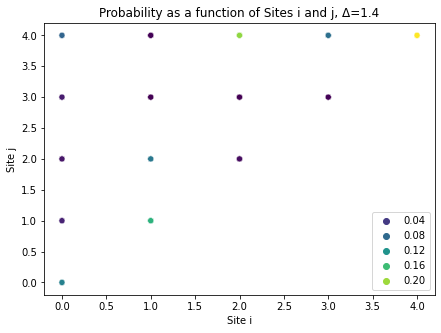

X=[0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0

<Figure size 504x360 with 0 Axes>

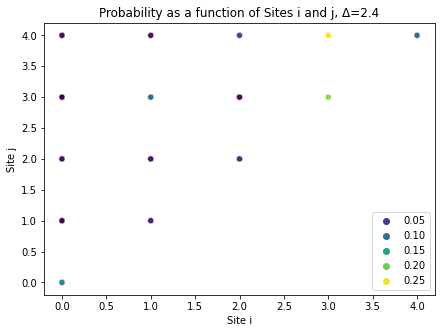

X=[0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 0, 0, 0

<Figure size 504x360 with 0 Axes>

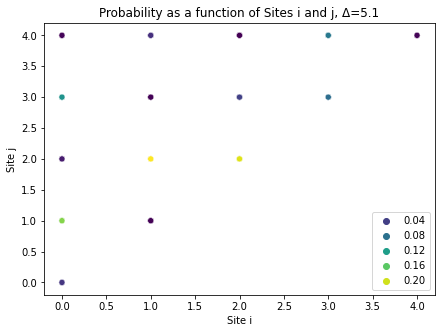

In [71]:
from scipy.special import comb
from itertools import combinations_with_replacement
from collections import Counter
import copy
from scipy.linalg import ishermitian
import seaborn as sns


params['dim'] = 0
params['occupationTuple_lst'] = []
params['U'] = 0


def dimension(params, **kwargs):
    '''
    For k identical bosonic particles on N lattice site, 
    Changes the dim and initializes the vac state
    based on dim.
    '''
    N, k, dim = params['N'], params['k'], int(params['dim']) # N = number of sites, k = no. of identical bosonic particles
    params['dim'] = int(comb(N+k-1, k)) # This is for k identical bosonic particles
    params['vac'] = np.zeros(N)
    pass
params['N'], params['k'] = 20, 1
dimension(params)
# print(params['dim'])
# print(repr(params['vac']))

params['Map_ParticleLoc_OccupNo']={}

def basis_states(params, **kwargs):
    '''
    For k-identical particles on N lattice site, 
    states_vec contain permutations of the particles
    arranged on the lattice.
    '''
    N, vac, k, dim, states_vec, occupation_lst = params['N'], params['vac'], params['k'], params['dim'], [], []
    occupationTuple_lst, Map_ParticleLoc_OccupNo = params['occupationTuple_lst'], params['Map_ParticleLoc_OccupNo']
    # particle_location: Gives all combinations of particle's location.
    # Gives list of tuples in which site each particle is located.
    particle_location = list(combinations_with_replacement(range(N), k)) 
#     print(f'particle_location={particle_location}')
    for i, p_loc in enumerate(particle_location):
        occupationTuple = [0 for _ in range(N)]
#         print(occupationTuple)
        vac = np.zeros(N, dtype=int)
        for site in p_loc:
#             print(f'site={site}')
            occupationTuple[site]+=1
            vac[site]+=1
        states_vec += [vac]
        params['occupationTuple_lst'] += [tuple(occupationTuple)]
        Map_ParticleLoc_OccupNo[p_loc] = tuple(occupationTuple)
#         print(params['occupationTuple_lst'])
#         states_vec += [normalizeWF(vac)]
#         count = Counter(p_loc)
#         print(f'count={count}')
#         for key, val in count.items():
#             vac[i][key] = val
#             print(f'vac[{i}][{key}]={val}')
#         vac[i] = normalizeWF(vac[i])
#     print(states_vec)    
    normfactors = {key: [] for key in occupationTuple_lst}
    params['normfactors'] = normfactors
    return states_vec, particle_location, occupationTuple_lst, normfactors, Map_ParticleLoc_OccupNo
bstates = basis_states(params)        
params['states_vec'] = bstates[0]
# print(params['states_vec'])
params['particle_location'] = bstates[1]
params['occupationTuple_lst'] = bstates[2]
params['normfactors'] = bstates[3]
params['Map_ParticleLoc_OccupNo'] = bstates[4]
# print(params['Map_ParticleLoc_OccupNo'])
# print(f'params[particle_location]={bstates[1]}')
# print(f'params[occupationTuple_lst]={bstates[2]}')
# print(f'params[normfactors]={bstates[3]}')


# def creationOp(params, **kwargs):
#     particle_location, occupationTuple_lst = params['particle_location'], params['occupationTuple_lst']
#     normfactors = params['normfactors']
# #     for key, val in normfactors:
        
# #     count = Counter(particle_location)
# #     print(f'normfactors={normfactors}')
#     pass
# creationOp(params)    

# def HamiltonianElements(params, **kwargs):
#     N, states_vec = params['N'], params['states_vec']
#     normfactors = params['normfactors']
#     states_vec1, states_vec2 = copy.deepcopy(states_vec), copy.deepcopy(states_vec)
#     creationOp, annihOp = False, False
#     for k in range(N-1):
#         print(f'states_vec1={states_vec1}')
#         print(f'states_vec2={states_vec2}')
#         for i, state in enumerate(states_vec1):
#             for j, number in enumerate(state):
#                 if k == j and state[k]!=0:
#                     print(f'state_vec1[i={i}]={state}')
#                     state[k] -= 1
#                     print(f'c_(k={k},j={j}) ={state[k]}, {state}')
#                     if k+1 == j+1:
#                         state[k+1] += 1
#                         print(f'dagger-c_(k={k+1},j={j+1}) ={state[k+1]}, {state}\n')
#                 elif k == j and state[k]==0:
#                     print('Testing1')
#                     state = np.zeros(N)
#                     print(f'c_(k={k},j={j}) ={state[k]}, {state}\n')
#                 if k+1 == j+1 and states_vec2[i][k+1]!=0:
# #                     print('Testing')
#                     print(f'states_vec2[i={i}]={states_vec2[i]}')
#                     states_vec2[i][k+1] -=1
#                     print(f'c_(k={k},j={j}) ={states_vec2[i][k]},{states_vec2[i]}')
#                     if k==j:
#                         states_vec2[i][k] +=1
#                         print(f'dagger-c_(k={k+1},j={j+1}) ={states_vec2[i][k+1]}, {states_vec2[i]}\n')
#                 elif k+1 == j+1 and states_vec2[i][k+1]==0:
#                     print('Testing2')
#                     states_vec2[i] = np.zeros(N)
#                     print(f'c_(k={k+1},j={j+1}) ={states_vec2[i][k+1]}, {states_vec2[i]}\n')
#                 print(f'At the end of j={j}')
#                 print(f'states_vec1={states_vec1}')
#                 print(f'states_vec2={states_vec2}\n')
#             print(f'At the end of i={i}')
#             print(f'states_vec1={states_vec1}')
#             print(f'states_vec2={states_vec2}\n')
# #             print('*********************************************')
# #                 print(i, state, states_vec[i])
# #     print(f'states_vec1={states_vec1}')
# #     print(f'states_vec2={states_vec2}')
#     pass
  
params['map_occupToD_Dim'] = {}
def Mapping_occupationToD_DimBasis(params, **kwargs):
    occupationTuple_lst, dim, map_occupToD_Dim = params['occupationTuple_lst'], params['dim'], params['map_occupToD_Dim']
    for i, occup_state in enumerate(occupationTuple_lst):
        map_occupToD_Dim[occup_state] = np.eye(1,dim,i)[0]
    zero_tupleComb = tuple(np.zeros(params['N'], dtype=int))
    map_occupToD_Dim[zero_tupleComb] = np.zeros(dim)
#     print(map_occupToD_Dim)
    return map_occupToD_Dim
# Mapping_occupationToD_DimBasis(params)

def Normalize_OccupNo(params, **kwargs):
    normfactors = params['normfactors']
    state, factor = kwargs['state'], kwargs['factor']
    if 'annihOp' in kwargs:
#         normfactors[state].append(1/np.sqrt(factor))
#         normfactors[state].append(factor)
        nf = 1/np.sqrt(factor)
#         nf = factor
#         print(normfactors)
    elif 'createOp' in kwargs:
#         normfactors[state].append(1/np.sqrt(factor+1))
#         normfactors[state].append(factor+1)
#         nf = factor+1
        nf = 1/np.sqrt(factor+1)
#         print(normfactors[state])
    return nf

# params['mu'] = 0.4
def HamiltonianElements(params, **kwargs):
    N, states_vec, dim = params['N'], params['states_vec'], params['dim']
    map_occupToD_Dim = Mapping_occupationToD_DimBasis(params)
    normfactors1, normfactors2 = copy.deepcopy(params['normfactors']), copy.deepcopy(params['normfactors'])
    Hr = np.zeros((dim, dim))
    states_vec1, states_vec2, states_vec3 = copy.deepcopy(states_vec), copy.deepcopy(states_vec), copy.deepcopy(states_vec)
#     print(f'states_vec1={states_vec1}')
#     print(f'states_vec2={states_vec2}')
#     print(f'states_vec3={states_vec3}')
    createOp, annihOp = False, False
    for i, state in enumerate(states_vec1): # Goes through each state
#         print(f'states_vec1={states_vec1}')
#         print(f'states_vec2={states_vec2}')
#         states_vec1, states_vec2 = copy.deepcopy(states_vec), copy.deepcopy(states_vec)
        vec3 = tuple(states_vec3[i])
#         print(f'\033[1mvec3={vec3}\033[0m')
#         for j, number in enumerate(state): # To loop through each site in a state - need it to apply Ck_{+}C_(k+1){-}
        for k in range(N-1):
            states_vec1, states_vec2 = copy.deepcopy(states_vec), copy.deepcopy(states_vec)
            states_vec4 = copy.deepcopy(states_vec)
            state = states_vec1[i]
#             print(f'\nAt the start of k={k}\n')
            ### For hopping term
            if state[k]>0: # C(k+1)_{+}C_(k){-}: states_vec1
                nf1 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                                            factor = state[k], annihOp=annihOp)
#                 normfactors[vec3].append(Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
#                                                             factor = state[k], annihOp=annihOp))
                normfactors1[vec3].append(nf1)
                state[k] -= 1 # annihilation
#                 normfactors[vec3].append(Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
#                                   factor = state[k+1], createOp=createOp))
                nf2 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                  factor = state[k+1], createOp=createOp)
                normfactors1[vec3].append(nf2)
                state[k+1] += 1 # creation
#                 print(f'C(k+1={k+1})_(+)C_(k={k})_(-):')
#                 print(f'state={state}')
#                 print(f'normfactors1[vec3]={normfactors1[vec3]}\n')
            elif state[k] == 0: #annihilation
                state = np.zeros_like(state)
                normfactors1[vec3].append(0)
#                 print(f'C(k+1={k+1})_(+)C_(k={k})(-) for when state[k]==0:')
#                 print(f'state={state}')
#                 print(f'normfactors1[vec3]={normfactors1[vec3]}\n')
            if states_vec2[i][k+1]>0: # C(k)_{+}C_(k+1){-}: states_vec2
                nf1 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                                            factor = states_vec2[i][k+1], annihOp=annihOp)
                normfactors2[vec3].append(nf1)
                states_vec2[i][k+1] -= 1 #annihilation
                nf2 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                                            factor = states_vec2[i][k], createOp=createOp)
                normfactors2[vec3].append(nf2)
                states_vec2[i][k] += 1 #creation
#                 print(f'C(k={k})_(+)C_(k+1={k+1})(-):')
#                 print(f'states_vec2[i]={states_vec2[i]}')
#                 print(f'normfactors2[vec3]={normfactors2[vec3]}\n')
            elif states_vec2[i][k+1] == 0: #annihilation
                states_vec2[i] = np.zeros_like(state)
                normfactors2[vec3].append(0)
#                 print(f'C(k={k})_(+)C_(k+1={k+1})(-) for when state[k+1]==0:')
#                 print(f'states_vec2[i]={states_vec2[i]}')
#                 print(f'normfactors2[vec3]={normfactors2[vec3]}\n')
#             print(f'normfactors1[vec3]={normfactors1[vec3]}')
#             print(f'normfactors2[vec3]={normfactors2[vec3]}')
#             print(map_occupToD_Dim)
            state1 = map_occupToD_Dim[tuple(state)] # C(k+1)_{+}C_(k){-}: states_vec1
            state2 = map_occupToD_Dim[tuple(states_vec2[i])] # C(k)_{+}C_(k+1){-}: states_vec2
#             print(tuple(state))
#             print(tuple(states_vec2[i]))
#             print(state1)
#             print(state2)
#             print(np.prod(normfactors1[vec3]))
#             print(np.prod(normfactors1[vec3])*state1)
            Hr[i] += -params['t']*(np.prod(normfactors1[vec3])*state1 + np.prod(normfactors2[vec3])*state2)
#             print(Hr)
            normfactors1[vec3], normfactors2[vec3] = [], []
#             print(f'states_vec1[i={i}]={state}')
#             print(f'states_vec2[i={i}]={states_vec2[i]}')
#             Hr[i] += states_vec2[i]+state
#             print(f'Hr={Hr}')

            ### For mu and U a_dagger a terms- 
            state = states_vec4[i]
#             print(state)
            if state[k]>0:
                nf1 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                                            factor = state[k], annihOp=annihOp)
                normfactors1[vec3].append(nf1)
#                 state[k]-=1
                nf2 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                  factor = state[k]-1, createOp=createOp)
                normfactors1[vec3].append(nf2)
#                 state[k]+=1
#                 print(f'C(k={k})_(+)C_(k={k})_(-):')
#                 print(f'state={state}')
#                 print(f'normfactors1[vec3]={normfactors1[vec3]}\n')
            elif state[k]==0:
#                 state = np.zeros_like(state)
                normfactors1[vec3].append(0)
#                 print(f'C(k={k})_(+)C_(k={k})_(-) for when state[k]==0:')
#                 print(f'state={state}')
#                 print(f'normfactors1[vec3]={normfactors1[vec3]}\n')
            state1 = map_occupToD_Dim[tuple(state)]
            Hr[i] += -params['mu']*(k)*(np.prod(normfactors1[vec3])*state1)
            Hr[i] += -params['U']*(1/2)*(np.prod(normfactors1[vec3])*state1)
            normfactors1[vec3] = []
            if k == (N-2) and state[k+1]!=0:
                nf1 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                                        factor = state[k+1], annihOp=annihOp)
                normfactors1[vec3].append(nf1)
#                 state[k+1]-=1
                nf2 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                  factor = state[k+1]-1, createOp=createOp)
                normfactors1[vec3].append(nf2)
#                 state[k+1]+=1
#                 print(f'C(k={k+1})_(+)C_(k={k+1})_(-) for when k==N-2:')
#                 print(f'state={state}')
#                 print(f'normfactors1[vec3]={normfactors1[vec3]}\n')
                state1 = map_occupToD_Dim[tuple(state)]
#                 print(state1)
                Hr[i] += -params['mu']*(k+1)*(np.prod(normfactors1[vec3])*state1)
                Hr[i] += -params['U']*(1/2)*(np.prod(normfactors1[vec3])*state1)
            elif k == (N-2) and state[k+1]==0:
#                 state = np.zeros_like(state)
                normfactors1[vec3].append(0)
#                 print(f'C(k={k})_(+)C_(k={k})_(-) for when state[k]==0 and k==N-2:')
#                 print(f'state={state}')
#                 print(f'normfactors1[vec3]={normfactors1[vec3]}\n')
                state1 = map_occupToD_Dim[tuple(state)]
#                 print(state1)
                Hr[i] += -params['mu']*(np.prod(normfactors1[vec3])*state1)
                Hr[i] += -params['U']*(1/2)*(np.prod(normfactors1[vec3])*state1)
            normfactors1[vec3], normfactors2[vec3] = [], []
            
            ### For U term
            states_vec4 = copy.deepcopy(states_vec)
            state = states_vec4[i]
            if state[k]>0:
                nf1 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                                            factor = state[k], annihOp=annihOp)
                normfactors1[vec3].append(nf1)
#                 state[k]-=1
                nf2 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                  factor = state[k]-1, createOp=createOp)
                normfactors1[vec3].append(nf2)
                nf3 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                                            factor = state[k], annihOp=annihOp)
                normfactors1[vec3].append(nf3)
#                 state[k]-=1
                nf4 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                  factor = state[k]-1, createOp=createOp)
                normfactors1[vec3].append(nf4)
#                 state[k]+=1
#                 print(f'C(k={k})_(+)C_(k={k})_(-):')
#                 print(f'state={state}')
#                 print(f'normfactors1[vec3]={normfactors1[vec3]}\n')
            elif state[k]==0:
#                 state = np.zeros_like(state)
                normfactors1[vec3].append(0)
#                 print(f'C(k={k})_(+)C_(k={k})_(-) for when state[k]==0:')
#                 print(f'state={state}')
#                 print(f'normfactors1[vec3]={normfactors1[vec3]}\n')
            state1 = map_occupToD_Dim[tuple(state)]
            Hr[i] += params['U']*(1/2)*(np.prod(normfactors1[vec3])*state1)
            normfactors1[vec3] = []
            if k == (N-2) and state[k+1]!=0:
                nf1 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                                        factor = state[k+1], annihOp=annihOp)
                normfactors1[vec3].append(nf1)
#                 state[k+1]-=1
                nf2 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                  factor = state[k+1]-1, createOp=createOp)
                normfactors1[vec3].append(nf2)
                nf3 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                                        factor = state[k+1], annihOp=annihOp)
                normfactors1[vec3].append(nf3)
#                 state[k+1]-=1
                nf4 = Normalize_OccupNo(params, state = tuple(states_vec3[i]), 
                                  factor = state[k+1]-1, createOp=createOp)
                normfactors1[vec3].append(nf4)
#                 state[k+1]+=1
#                 print(f'C(k={k+1})_(+)C_(k={k+1})_(-) for when k==N-2:')
#                 print(f'state={state}')
#                 print(f'normfactors1[vec3]={normfactors1[vec3]}\n')
                state1 = map_occupToD_Dim[tuple(state)]
                Hr[i] += params['U']*(1/2)*(np.prod(normfactors1[vec3])*state1)
            elif k == (N-2) and state[k+1]==0:
                normfactors1[vec3].append(0)
                state1 = map_occupToD_Dim[tuple(state)]
                Hr[i] += params['U']*(1/2)*(np.prod(normfactors1[vec3])*state1)
            normfactors1[vec3], normfactors2[vec3] = [], []
            
            
            
#     print(Hr)
#     print(ishermitian(Hr))
    eigval, eigvec = np.linalg.eig(Hr)
    diagonal_Hr = np.diag(eigval)
#     print(Hr)
    return Hr, diagonal_Hr
    
for mu in [0.4, 1.4, 2.4, 5.1]:
    params['mu'] = mu
    Hr, diagonal_Hr = HamiltonianElements(params)
    # eigval, eigvec = np.linalg.eig(Hr)
    # print(Hr)
    # print(diagonal_Hr)
    # print(f'eigval={eigval}\n eigvec={eigvec}')

    params['tau'] = 0.1
    psi0 = np.random.randn(params['dim'])
#     psi0 = np.zeros(params['dim'], dtype=complex)
#     psi0[10] = 0.25
#     psi0[11] = 0.25
#     psi0[12] = 0.5
    psi_nm = normalizeWF(psi0)
#     print(f'psi0={psi0}\n')
#     print(f'psi_nm={psi_nm}\n')
    params['T'] = 10
    t_list, psi_t = np.arange(0, params['T'], params['tau']), []
    # print(t_list)
    for i, t in enumerate(t_list):
        U = expm(-1j*diagonal_Hr*t)
        psi_t +=  [U@psi_nm]

    # print(psi_t)
    Map_ParticleLoc_OccupNo = params['Map_ParticleLoc_OccupNo'] 
    # print(f'Map_ParticleLoc_OccupNo={Map_ParticleLoc_OccupNo}')
    # particle_location = list(combinations_with_replacement(range(params['N']), params['k'])) 
    # print(f'particle_location={particle_location}')

    # print(psi_nm)
    # print(psi_t)
    prob, x, y = [], [], []
    map_occupToD_Dim = Mapping_occupationToD_DimBasis(params)
    # print(map_occupToD_Dim)
    for psi in psi_t:
        for i, p in enumerate(psi):
            prob+=[p]
            f = np.zeros(params['dim'])
            f[i] = 1.0
    #         print(repr(f))
    #         print(f'psi={psi}')
    #         print(f'i={i}, p = {p}')
            for key, val in map_occupToD_Dim.items():
                if np.array_equal(f, val) == True:
                    for site, v in Map_ParticleLoc_OccupNo.items():
                        if v == key:
                            x += [site[0]]
                            y += [site[1]]
    #                         print(key, site)
    #                 print('\n')

    #         print(f'map_occupToD_Dim[i={i}] = {map_occupToD_Dim[i]}\n')

    mu = params['mu']
    plt.figure(figsize=[7, 5])
    p = plt.get_cmap('Blues')
#     print(prob[0])
    # print(f'x={len(x)}, y={len(y)}, prob={len(prob)}')
    create_heatmap(x, y, prob)

# x, y, prob = np.array(x), np.array(y), np.array(prob)
# print(f'x={repr(x)}\ny={y.shape}\nprob={prob}')

# X = np.array(X)
# Y = np.array(Y)
# probabilities = np.array(probabilities)

# # Determine the unique values and the dimensions of the heatmap
# x_unique = np.unique(X)
# y_unique = np.unique(Y)
# print(repr(y_unique))
# heatmap_data = np.zeros((len(y_unique), len(x_unique)))

# # Fill the heatmap data
# for (x, y, prob) in zip(X, Y, probabilities):
#     print(repr(y))
#     i = np.where(y_unique == y)[0][0]
#     j = np.where(x_unique == x)[0][0]
#     heatmap_data[i, j] = prob

# Create the heatmap using seaborn
# sns.heatmap(heatmap_data, xticklabels=x_unique, yticklabels=y_unique, cmap=p, annot=True)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Heatmap of Probabilities')
# plt.show()

# plt.pcolormesh(x, y, prob, cmap=p)
# plt.colorbar(label='Probability') 
# plt.xlabel('Site j')
# plt.ylabel('Site i')
# plt.title(f'Probability as a function of Sites i and j, Δ={mu}')
# plt.show()

In [56]:
np.zeros(3)

array([0., 0., 0.])

In [39]:
np.version.version


'1.22.3'

In [42]:
lst = [np.sqrt(2), 3,  1]
# print(reduce(*, lst, 1))
print(np.prod(lst))

4.242640687119286


In [113]:
from scipy.special import comb
from itertools import combinations_with_replacement
from collections import Counter
import copy

params['dim'] = 0
params['occupationTuple_lst'] = []

def dimension(params, **kwargs):
    '''
    For k identical bosonic particles on N lattice site, 
    Changes the dim and initializes the vac state
    based on dim.
    '''
    N, k, dim = params['N'], params['k'], int(params['dim']) # N = number of sites, k = no. of identical bosonic particles
    params['dim'] = int(comb(N+k-1, k)) # This is for k identical bosonic particles
    print(params['dim'])
    params['vac'] = np.zeros(params['dim'])
    pass
params['N'], params['k'] = 2, 2
dimension(params)


3


In [85]:
for k in range(params['N']):
    for j in range(3):
        if k+1 == j+1:
            print(True)

True
True
True


In [95]:
states_vec = params['states_vec']
states_vec1, states_vec2 = copy.deepcopy(states_vec), copy.deepcopy(states_vec)
states_vec1[0][0], states_vec1[0][1] = 1, 1
print(f'states_vec1={states_vec1}')
print(f'states_vec2={states_vec2}')

states_vec1=[array([1, 1, 0]), array([1, 1, 0]), array([1, 1, 0]), array([1, 1, 0]), array([1, 1, 0]), array([0, 0, 2])]
states_vec2=[array([2, 0, 0]), array([1, 1, 0]), array([1, 1, 0]), array([1, 1, 0]), array([1, 1, 0]), array([0, 0, 2])]


In [84]:
print(2+1==2+1)

True


In [106]:
import numpy as np
from itertools import combinations_with_replacement

def construct_bosonic_basis_vectors(N, k):
    # Generate all combinations with repetition
    combinations = list(combinations_with_replacement(range(N), k))
    
    # Initialize a list to hold the basis vectors
    basis_vectors = []
    
    # For each combination, create the state vector
    for comb in combinations:
        state_vector = np.zeros(N, dtype=int)
        for site in comb:
            state_vector[site] += 1
        basis_vectors.append(state_vector)
    
    return basis_vectors

def find_basis_index(basis_vectors, target_vector):
    for idx, vec in enumerate(basis_vectors):
        if np.array_equal(vec, target_vector):
            return idx
    return -1

def construct_hamiltonian(N, k, J):
    # Construct the basis vectors
    basis_vectors = construct_bosonic_basis_vectors(N, k)
    dim = len(basis_vectors)
    
    # Initialize the Hamiltonian matrix
    H = np.zeros((dim, dim), dtype=complex)
    
    # Loop over each basis vector
    for idx, vec in enumerate(basis_vectors):
        for i in range(N-1):
            if vec[i] > 0 and vec[i+1] < k:
                # Apply the term c_i^\dagger c_{i+1}
                new_vec = vec.copy()
                new_vec[i] -= 1
                new_vec[i+1] += 1
                jdx = find_basis_index(basis_vectors, new_vec)
                if jdx != -1:
                    H[idx, jdx] -= J * np.sqrt((vec[i] + 1) * (vec[i+1] + 1))
                
                # Apply the term c_{i+1}^\dagger c_i
                new_vec = vec.copy()
                new_vec[i] += 1
                new_vec[i+1] -= 1
                jdx = find_basis_index(basis_vectors, new_vec)
                if jdx != -1:
                    H[idx, jdx] -= J * np.sqrt(vec[i] * vec[i+1])
    
    return H, basis_vectors

# Parameters
N = 4  # Number of sites
k = 2  # Number of particles
J = 1.0  # Hopping term

# Construct the Hamiltonian
H, basis_vectors = construct_hamiltonian(N, k, J)

# Print the Hamiltonian matrix
print("Hamiltonian matrix:")
print(H)

# Print the basis vectors
print("Basis vectors:")
for idx, vec in enumerate(basis_vectors):
    print(f"Basis vector {idx+1}: {vec}")


Hamiltonian matrix:
[[ 0.        +0.j -1.73205081+0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j]
 [-1.        +0.j  0.        +0.j -1.41421356+0.j  0.        +0.j
  -2.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j -1.41421356+0.j
   0.        +0.j -1.41421356+0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j -1.41421356+0.j  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j -1.73205081+0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
  -1.        +0.j  0.        +0.j -1.41421356+0.j -2.        +0.j
   0.        

In [72]:
import numpy as np
from itertools import combinations_with_replacement

N, k=2, 2
combinations = list(combinations_with_replacement(range(N), k))
print(combinations)

[(0, 0), (0, 1), (1, 1)]


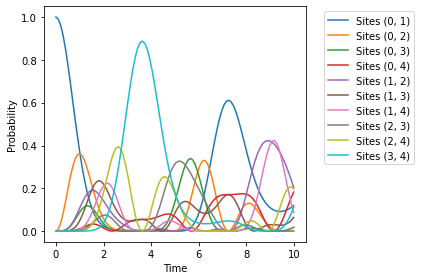

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from itertools import combinations

def create_basis(n):
    """
    Create the basis states for two fermions in an n-site chain.
    """
    return list(combinations(range(n), 2))

def create_hamiltonian(n, t, basis):
    """
    Create the Hamiltonian for the two-particle system in an n-site chain with hopping parameter t.
    """
    dim = len(basis)
    H = np.zeros((dim, dim), dtype=complex)
    
    for idx, (i, j) in enumerate(basis):
        for delta in [-1, 1]:
            if 0 <= i + delta < n and (i + delta, j) in basis:
                new_idx = basis.index((min(i + delta, j), max(i + delta, j)))
                H[idx, new_idx] = -t
            if 0 <= j + delta < n and (i, j + delta) in basis:
                new_idx = basis.index((min(i, j + delta), max(i, j + delta)))
                H[idx, new_idx] = -t
    
    return H

def initial_state(n, site1, site2, basis):
    """
    Create the initial state with the two particles localized at specific sites.
    """
    psi0 = np.zeros(len(basis), dtype=complex)
    initial_idx = basis.index((min(site1, site2), max(site1, site2)))
    psi0[initial_idx] = 1.0
    return psi0

def time_evolution(H, psi0, times):
    """
    Perform time evolution of the initial state psi0 under Hamiltonian H for given times.
    """
    evolution = []
    for t in times:
        U = expm(-1j * H * t)
        psi_t = np.dot(U, psi0)
        evolution.append(psi_t)
    return evolution

# Parameters
n = 5          # Number of sites
t = 1.0        # Hopping parameter
site1 = 0      # Initial site of the first particle
site2 = 1      # Initial site of the second particle
times = np.linspace(0, 10, 100)  # Time points

# Create basis, Hamiltonian and initial state
basis = create_basis(n)
H = create_hamiltonian(n, t, basis)
psi0 = initial_state(n, site1, site2, basis)

# Perform time evolution
evolution = time_evolution(H, psi0, times)

# Plot the probability distribution over time
fig, ax = plt.subplots()
for idx, (i, j) in enumerate(basis):
    probabilities = [np.abs(psi[idx])**2 for psi in evolution]
    ax.plot(times, probabilities, label=f'Sites ({i}, {j})')
ax.set_xlabel('Time')
ax.set_ylabel('Probability')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


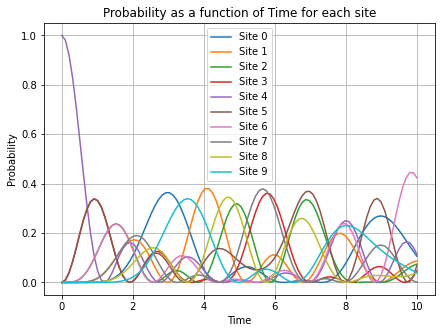

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Parameters
params = {
    'N': 10,  # Number of sites
    't': 1.0, # Hopping parameter
    'localized_site': 4, # Initial localized site
    'T': 10,  # Total time
    'tau': 1  # Time step
}

# Initial state
psi0 = np.zeros(params['N'], dtype=complex)
psi0[params['localized_site']] = 1.0

# Time list
t_list = np.linspace(0, params['T'], 100)

# Hamiltonian
H = np.zeros((params['N'], params['N']), dtype=complex)
for i in range(params['N'] - 1):
    H[i][i + 1] = -params['t']
    H[i + 1][i] = -params['t']

# Time evolution
psi_t = []
for t in t_list:
    U = expm(-1j * H * t)
    psi_t += [U @ psi0]

# Plotting probabilities
plt.figure(figsize=[7, 5])
for i in range(params['N']):
    prob = [np.abs(psi[i])**2 for psi in psi_t]
    plt.plot(t_list, prob, label=f"Site {i}")

plt.legend()
plt.xlabel("Time")
plt.ylabel("Probability")
plt.title("Probability as a function of Time for each site")
plt.grid(True)
plt.show()


In [ ]:
def create_hamiltonian(n, t):
    """
    Create the tight-binding Hamiltonian for an n-site chain with hopping parameter t.
    """
    H = np.zeros((n, n), dtype=complex)
    for i in range(n-1):
        H[i, i+1] = -t
        H[i+1, i] = -t
    return H

def initial_state(n, site):
    """
    Create the initial state with the particle localized at a specific site.
    """
    psi0 = np.zeros(n, dtype=complex)
    psi0[site] = 1.0
    return psi0

def time_evolution(H, psi0, times):
    """
    Perform time evolution of the initial state psi0 under Hamiltonian H for given times.
    """
    evolution = []
    for t in times:
        U = expm(-1j * H * t)
        psi_t = np.dot(U, psi0)
        evolution.append(psi_t)
    return evolution

# Parameters
n = 10          # Number of sites
t = 1.0         # Hopping parameter
initial_site = 5 # Initial site where the particle is localized
times = np.linspace(0, 10, 100)  # Time points

# Create Hamiltonian and initial state
H = create_hamiltonian(n, t)
print(repr(H))
psi0 = initial_state(n, initial_site)

# Perform time evolution
evolution = time_evolution(H, psi0, times)

# Plot the probability distribution over time
fig, ax = plt.subplots()
for i in range(n):
    probabilities = [np.abs(psi[i])**2 for psi in evolution]
    ax.plot(times, probabilities, label=f'Site {i}')
ax.set_xlabel('Time')
ax.set_ylabel('Probability')
ax.legend()
plt.show()


In [32]:
print(reduce(np.kron, [X, I, I]))

[[0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]]


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed

def create_hamiltonian(n, t):
    """
    Create the tight-binding Hamiltonian for an n-site chain with hopping parameter t.
    """
    H = np.zeros((n, n), dtype=complex)
    for i in range(n-1):
        H[i, i+1] = -t
        H[i+1, i] = -t
    return H

def initial_state(n, site):
    """
    Create the initial state with the particle localized at a specific site.
    """
    psi0 = np.zeros(n, dtype=complex)
    psi0[site] = 1.0
    return psi0

def time_evolution(H, psi0, times):
    """
    Perform time evolution of the initial state psi0 under Hamiltonian H for given times.
    """
    evolution = []
    for t in times:
        U = expm(-1j * H * t)
        psi_t = np.dot(U, psi0)
        evolution.append(psi_t)
    return evolution

def plot_probabilities(time_index, site, n, t, times):
    """
    Plot the probability distribution of the particle over the sites at a given time.
    """
    # Create Hamiltonian and initial state
    H = create_hamiltonian(n, t)
    psi0 = initial_state(n, site)
    
    # Perform time evolution
    evolution = time_evolution(H, psi0, times)
    
    # Get probabilities at the specified time
    psi_t = evolution[time_index]
    probabilities = np.abs(psi_t)**2

    # Plot the probabilities
    plt.figure(figsize=(8, 6))
    plt.bar(range(n), probabilities, color='blue', alpha=0.7)
    plt.xlabel('Site')
    plt.ylabel('Probability')
    plt.title(f'Time = {times[time_index]:.2f}')
    plt.ylim(0, 1)
    plt.show()

# Parameters
n = 10          # Number of sites
t = 1.0         # Hopping parameter
times = np.linspace(0, 10, 100)  # Time points

# Create interactive widgets
time_slider = widgets.IntSlider(min=0, max=len(times)-1, step=1, value=0, description='Time Index')
site_slider = widgets.IntSlider(min=0, max=n-1, step=1, value=0, description='Initial Site')

# Interactive plot
interactive_plot = interactive(plot_probabilities, 
                               time_index=time_slider, 
                               site=site_slider, 
                               n=fixed(n), 
                               t=fixed(t), 
                               times=fixed(times))

output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot


interactive(children=(IntSlider(value=0, description='Time Index', max=99), IntSlider(value=0, description='In…

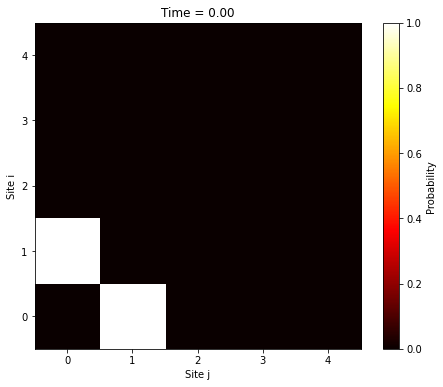

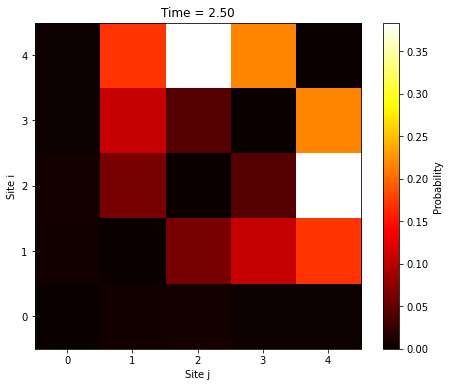

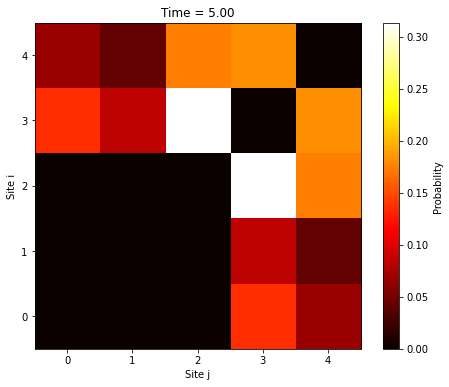

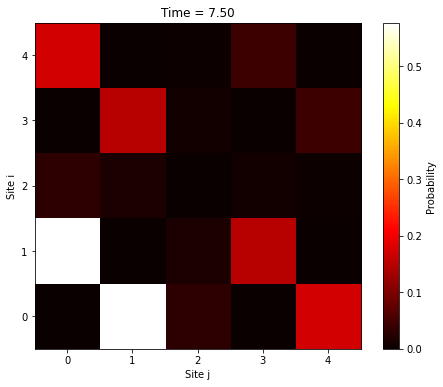

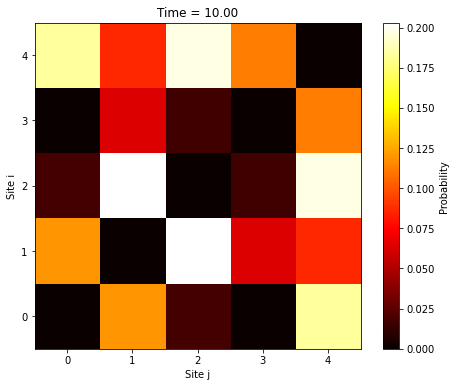

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from itertools import combinations

def create_basis(n):
    """
    Create the basis states for two fermions in an n-site chain.
    """
    return list(combinations(range(n), 2))

def create_hamiltonian(n, t, basis):
    """
    Create the Hamiltonian for the two-particle system in an n-site chain with hopping parameter t.
    """
    dim = len(basis)
    H = np.zeros((dim, dim), dtype=complex)
    
    for idx, (i, j) in enumerate(basis):
        for delta in [-1, 1]:
            if 0 <= i + delta < n and (i + delta, j) in basis:
                new_idx = basis.index((min(i + delta, j), max(i + delta, j)))
                H[idx, new_idx] = -t
            if 0 <= j + delta < n and (i, j + delta) in basis:
                new_idx = basis.index((min(i, j + delta), max(i, j + delta)))
                H[idx, new_idx] = -t
    
    return H

def initial_state(n, site1, site2, basis):
    """
    Create the initial state with the two particles localized at specific sites.
    """
    psi0 = np.zeros(len(basis), dtype=complex)
    initial_idx = basis.index((min(site1, site2), max(site1, site2)))
    psi0[initial_idx] = 1.0
    return psi0

def time_evolution(H, psi0, times):
    """
    Perform time evolution of the initial state psi0 under Hamiltonian H for given times.
    """
    evolution = []
    for t in times:
        U = expm(-1j * H * t)
        psi_t = np.dot(U, psi0)
        evolution.append(psi_t)
    return evolution

def plot_heatmap(evolution, basis, times, n):
    """
    Plot heatmap of the probability distribution over time.
    """
    for time_index, t in enumerate(times):
        prob_matrix = np.zeros((n, n))
        psi_t = evolution[time_index]
        
        for idx, (i, j) in enumerate(basis):
            prob_matrix[i, j] = np.abs(psi_t[idx])**2
            prob_matrix[j, i] = prob_matrix[i, j]  # Symmetric matrix

        plt.figure(figsize=(8, 6))
        plt.imshow(prob_matrix, origin='lower', cmap='hot', interpolation='nearest')
        plt.colorbar(label='Probability')
        plt.title(f'Time = {t:.2f}')
        plt.xlabel('Site j')
        plt.ylabel('Site i')
        plt.show()

# Parameters
n = 5          # Number of sites
t = 1.0        # Hopping parameter
site1 = 0      # Initial site of the first particle
site2 = 1      # Initial site of the second particle
times = np.linspace(0, 10, 5)  # Time points (reduced for clarity)

# Create basis, Hamiltonian and initial state
basis = create_basis(n)
H = create_hamiltonian(n, t, basis)
psi0 = initial_state(n, site1, site2, basis)

# Perform time evolution
evolution = time_evolution(H, psi0, times)

# Plot heatmap of the probability distribution over time
plot_heatmap(evolution, basis, times, n)
